<div style="background-color: darkslategray; color: white; padding: 15px; border-radius: 8px;">
    <center><h1 style="font-family: Arial, sans-serif;">TO GRANT OR NOT TO GRANT: DECIDING ON COMPENSATION BENEFITS</h1></center>
    <center><h3 style="font-family: Arial, sans-serif;">Machine Learning Project</h3></center>
</div>

**<h3>Table of Contents</h3>**
* [1. Environment Setup](#1.-Environment-Setup)
    * [1.1 Importing Libraries](#1.1-Importing-Libraries)
    * [1.2 Importing the data set](#1.2-Importing-the-data-set)
* [2. Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
    * [2.1 General analysis of the data set](#2.1-General-analysis-of-the-data-set)
    * [2.1.1 Treating duplicates](#2.1.1-Treating-duplicates)
    * [2.1.2 Missing Values](#2.1.2-Missing-Values)
    * [2.1.3 Type conversion](#2.1.3-type-conversion)
    * [2.1.4 Visual Exploration](#2.1.4-visual-exploration)
    * [2.1.5 Numerical features- Univariate analysis](#215-numerical-features---univariate-analysis)
    * [2.1.6 Categorical Features- Univariate Analysis](#216-categorical-features--univariate-analysis)
    * [2.1.7 Multivariate Analysis](#217-multivariate-analysis)
    * [2.1.8 Feature Engineering](#218-feature-engineering)
* [3. Data Preprocessing](#3.-Data-Preprocessing)
    * [3.1 Numerical Data](#31-numerical-data)
    * [3.2 Outliers Treatment](#32-outliers-treatment)
    * [3.3 Categorical Features Preprocessing](#33-categorical-features-preprocessing)
    * [3.4 Data Scaling (Numerical)](#34-data-scaling-numerical)
    * [3.5 Encoding](#35-encoding)
* [4. Models](#4-first-simple-model--random-forest)
    * [4.1 Random Forest](#41-random-forest)

## 1. Environment Setup

### 1.1 Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score

### 1.2 Importing the data set

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
train_data = pd.read_csv('train_data.csv', index_col='Claim Identifier')
test_data = pd.read_csv('test_data.csv', index_col='Claim Identifier')

C:\Users\inesm\AppData\Local\Temp\ipykernel_7824\3470921380.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train_data.csv', index_col='Claim Identifier')


In [4]:
#drop target variable
df = train_data.drop(columns='Claim Injury Type')

## 2. Exploratory Data Analysis

### 2.1 General analysis of the data set

In [5]:
df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [6]:
df.tail()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
327160035,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6165075,2022-12-13,72.0,N,2022-12-31,N,0.0,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,SULLIVAN,N,BINGHAMTON,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,I,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
249875936,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120584215,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
818961390,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(593471, 31)

Surprise we have a whole fucking lot of features with Dtype object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  County of Injury      

In [9]:
df.describe(include='all')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
count,570337,574026.000000,574026,593471,574026,5.453750e+05,544948.000000,559466,187245,574026,574026,574026,574026,574026,150798,574026,132803.000000,564068.000000,564068,574026,0.0,558386.000000,558386,558369.000000,558369,556944.000000,556944,545389,574026.000000,574026,574026.000000
unique,5539,NaN,3,1096,2,NaN,NaN,2475,1648,2046,8,63,2,8,1094,4,NaN,NaN,20,5,NaN,NaN,74,NaN,56,NaN,54,10060,NaN,1,NaN
top,2020-03-01,NaN,N,2020-03-06,N,NaN,NaN,2021-05-11,2021-04-21,STATE INSURANCE FUND,1A. PRIVATE,SUFFOLK,N,NYC,2022-04-15,M,NaN,NaN,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,NaN,LIFTING,NaN,STRAIN OR TEAR,NaN,LOWER BACK AREA,11236,NaN,Not Work Related,NaN
freq,1245,NaN,571412,1422,392291,NaN,NaN,1847,350,111144,285368,60430,546505,270779,440,335218,NaN,NaN,114339,265981,NaN,NaN,46610,NaN,153373,NaN,51862,3302,NaN,574026,NaN
mean,NaN,42.114270,NaN,NaN,NaN,4.910883e+02,1886.767604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.207337,58.645305,NaN,NaN,NaN,54.381143,NaN,41.013839,NaN,39.738146,NaN,NaN,0.046665,NaN,3.006559
std,NaN,14.256432,NaN,NaN,NaN,6.092918e+03,414.644423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.832303,19.644175,NaN,NaN,NaN,25.874281,NaN,22.207521,NaN,22.365940,NaN,NaN,0.210921,NaN,2.000801
min,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,11.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,-9.000000,NaN,NaN,0.000000,NaN,0.000000
25%,NaN,31.000000,NaN,NaN,NaN,0.000000e+00,1965.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,45.000000,NaN,NaN,NaN,31.000000,NaN,16.000000,NaN,33.000000,NaN,NaN,0.000000,NaN,1.000000
50%,NaN,42.000000,NaN,NaN,NaN,0.000000e+00,1977.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,61.000000,NaN,NaN,NaN,56.000000,NaN,49.000000,NaN,38.000000,NaN,NaN,0.000000,NaN,3.000000
75%,NaN,54.000000,NaN,NaN,NaN,8.410000e+02,1989.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,71.000000,NaN,NaN,NaN,75.000000,NaN,52.000000,NaN,53.000000,NaN,NaN,0.000000,NaN,5.000000


### 2.1.1 Treating duplicates

We have duplicate values that need to be removed

In [10]:
#duplicated values
df.duplicated().sum()

18351

Since this all the claims have _`Assembly Date`_ we can assume that in order to have a claim you always have a _`Claim Identifier`_ (that we use as index) and an _`Assembly Date`_. So let's check the rows that only have _`Assembly Date`_ filled, i.e, empty rows.

In [11]:

only_assembly_date = df.drop(columns=['Assembly Date']).isnull().all(axis=1) & df['Assembly Date'].notnull()


num_only_assembly_date_filled = only_assembly_date.sum()
print(f"Number of rows with only 'Assembly Date' filled: {num_only_assembly_date_filled}")

Number of rows with only 'Assembly Date' filled: 19445


### 2.1.2 Missing Values

In [12]:
df.isnull().sum()/df.shape[0]*100

Accident Date                           3.898084
Age at Injury                           3.276487
Alternative Dispute Resolution          3.276487
Assembly Date                           0.000000
Attorney/Representative                 3.276487
Average Weekly Wage                     8.104187
Birth Year                              8.176137
C-2 Date                                5.729850
C-3 Date                               68.449174
Carrier Name                            3.276487
Carrier Type                            3.276487
County of Injury                        3.276487
COVID-19 Indicator                      3.276487
District Name                           3.276487
First Hearing Date                     74.590502
Gender                                  3.276487
IME-4 Count                            77.622664
Industry Code                           4.954412
Industry Code Description               4.954412
Medical Fee Region                      3.276487
OIICS Nature of Inju

In [13]:
train_data['C-3 Date'].value_counts(dropna=False)
len(train_data['C-3 Date'].unique())

1649

In [14]:
train_data['First Hearing Date'].value_counts(dropna=False)

print(len(train_data['First Hearing Date'].unique()))

1095


In [15]:
train_data['IME-4 Count'].value_counts(dropna=False)

print(len(train_data['IME-4 Count'].unique()))

42


In [16]:
df.describe(include='O')
  

,Accident Date,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Zip Code,WCB Decision
count,570337,574026,593471,574026,559466,187245,574026,574026,574026,574026,574026,150798,574026,564068,574026,558386,558369,556944,545389,574026
unique,5539,3,1096,2,2475,1648,2046,8,63,2,8,1094,4,20,5,74,56,54,10060,1
top,2020-03-01,N,2020-03-06,N,2021-05-11,2021-04-21,STATE INSURANCE FUND,1A. PRIVATE,SUFFOLK,N,NYC,2022-04-15,M,HEALTH CARE AND SOCIAL ASSISTANCE,IV,LIFTING,STRAIN OR TEAR,LOWER BACK AREA,11236,Not Work Related
freq,1245,571412,1422,392291,1847,350,111144,285368,60430,546505,270779,440,335218,114339,265981,46610,153373,51862,3302,574026


### Observations

#### Missing Values ####
OIICS Nature of Injury Description has no values

_`IME-4 Count`_, _`First Hearing Date`_ and _`C-3 Date`_ have >50% of entries missing ( 77.6%, 74.5 and 68.4%, respectively)

#### Single Value Feature ####
The feature _`WCB Decision`_ only has one value along the whole dataset (excluding missing values of course)

#### Categorical features that could be represented as boolean ####
Some categorical variables that only present 2 unique values, usually '1s and 0s' or 'Y or N' could be changed to boolean. Since we are not doing data pre-processing yet, these changes would have to preserve any NaN data. The variables are:
- Agreement Reached (0s and 1s)
- Attorney/Representative (Y or N)
- COVID-19 Indicator (Y or N)

---

### 2.1.3 Type conversion
Here we are converting categorical variables that could be represented as boolean, meaning they only have two unique values, while still perserving the NaN entries present in the dataset.

In [17]:
#function to transform Y and N into boolean while preserving the NaNs
def transform_strings_in_bool(df, col_names):
    for col_name in col_names:
        df[col_name] = df[col_name].map({'Y': True, 'N': False, np.nan: np.nan})
    return df

In [18]:
# Agreement Reached only has values of  0s and 1s so lets convert it to boolean
df['Agreement Reached'] = df['Agreement Reached'].astype("boolean")


In [19]:

df = transform_strings_in_bool(df, ['Attorney/Representative','COVID-19 Indicator'])
print(df['Attorney/Representative'].unique(), df['COVID-19 Indicator'].unique())


[False True nan] [False nan True]


---

### 2.1.4 Visual Exploration

#### Numerical Feature Correlation

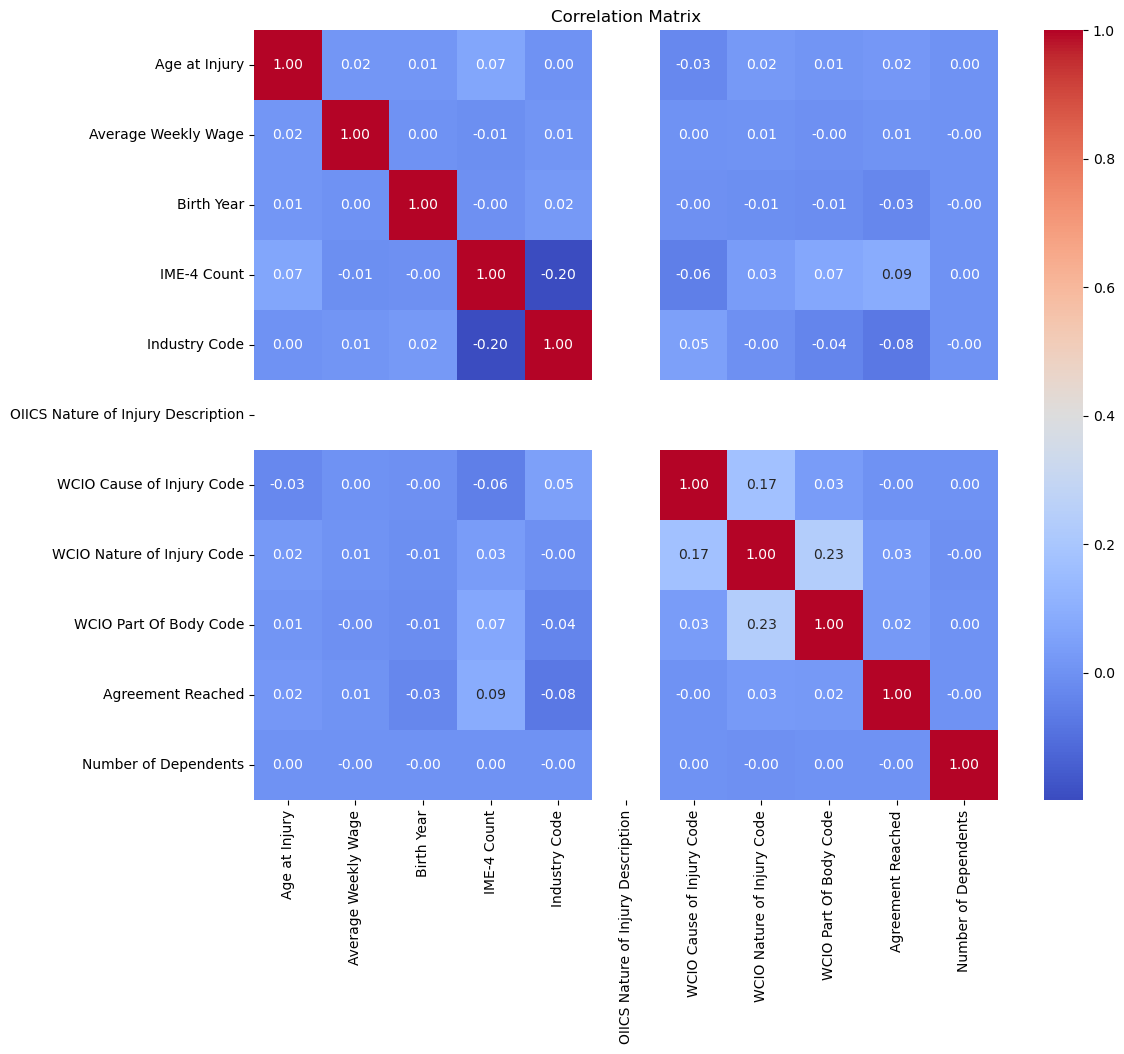

In [20]:
# Filter the dataframe to include only integer and float columns
numeric_train_data = train_data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_train_data.corr()

# Plot the correlation matrix using matplotlib
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

As this heatmap shows, theres not much to say about the correlations between features

#### Outliers

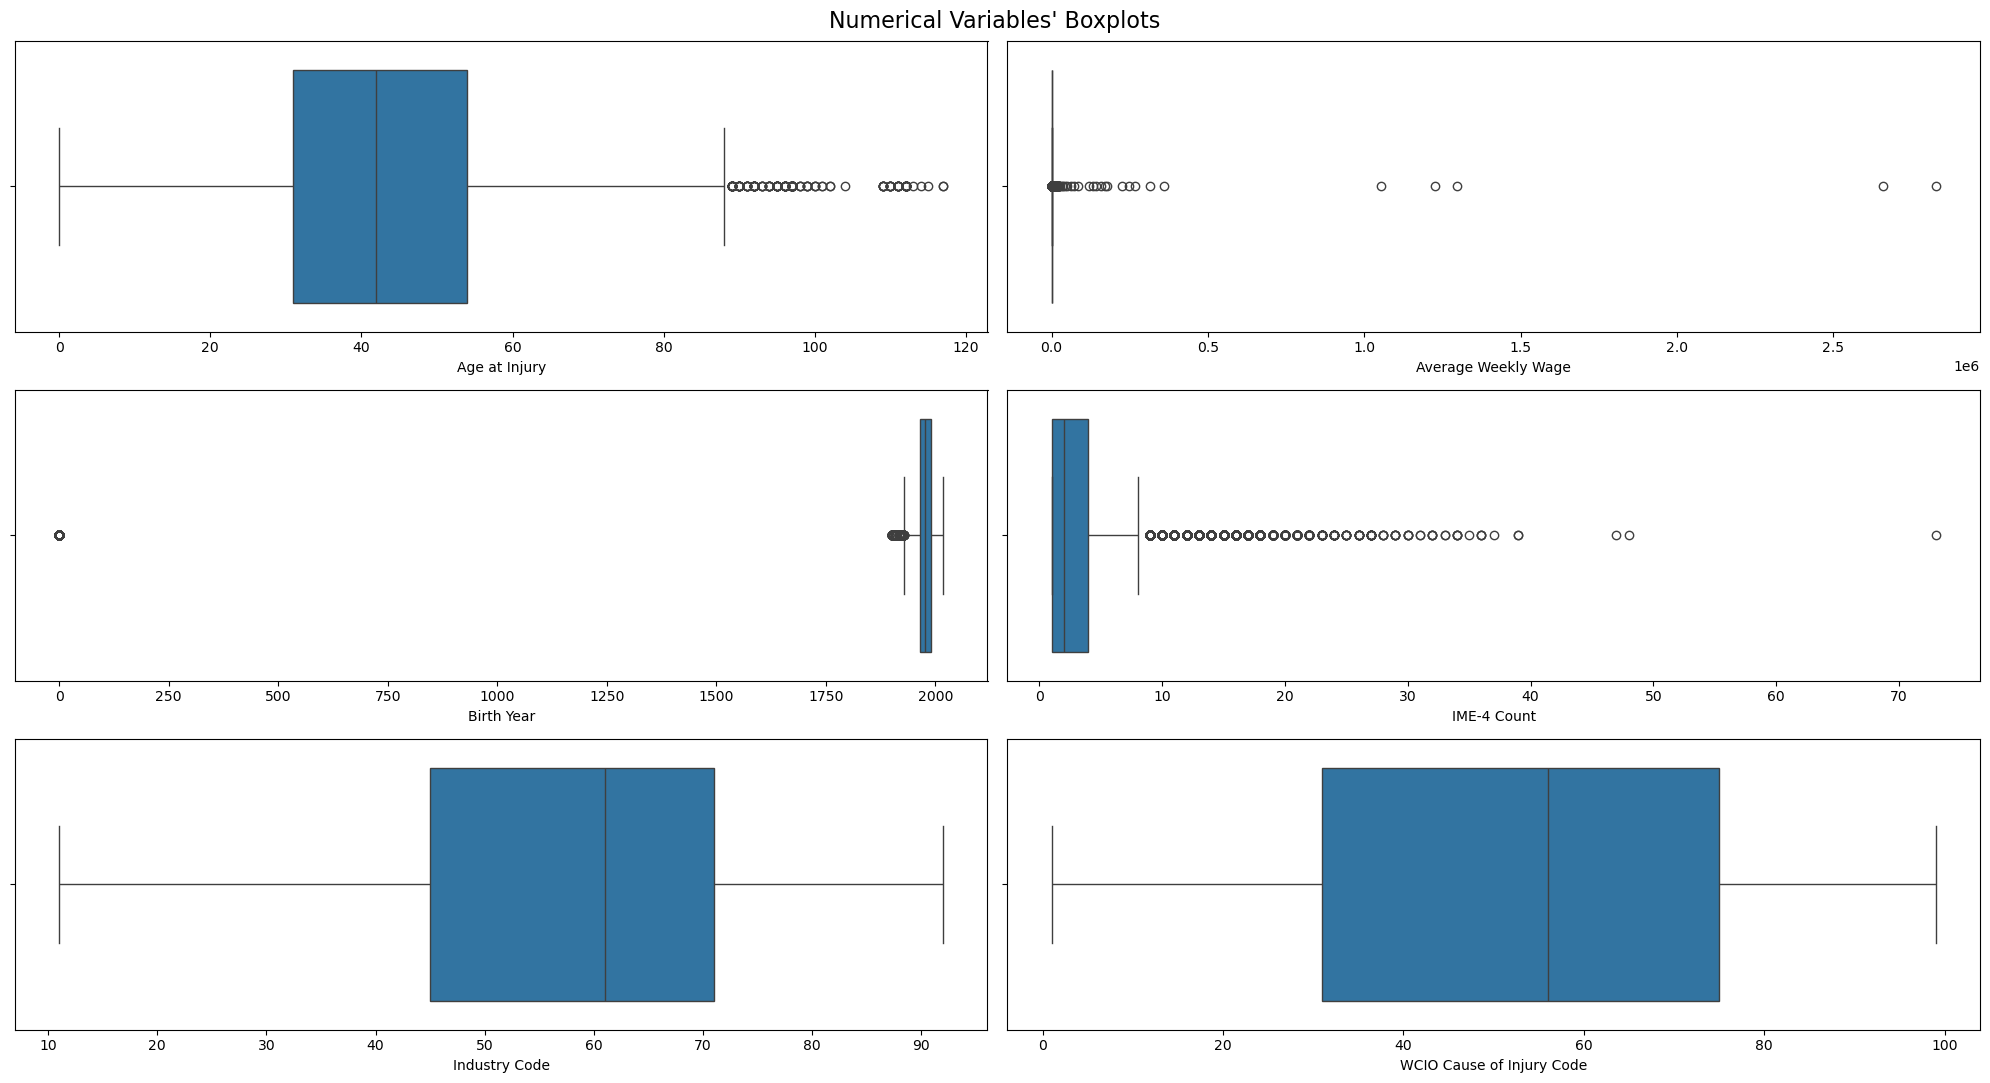

In [21]:
numeric_train_data = numeric_train_data.dropna(axis=1, how='all')

sp_rows = 3
sp_cols = 2

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11), tight_layout=True)

features = numeric_train_data.select_dtypes(include=['number']).columns.tolist()

for ax, feat in zip(axes.flatten(), features):
    sns.boxplot(x=numeric_train_data[feat], ax=ax)

title = "Numerical Variables' Boxplots"
plt.suptitle(title, fontsize=16) 
plt.show()

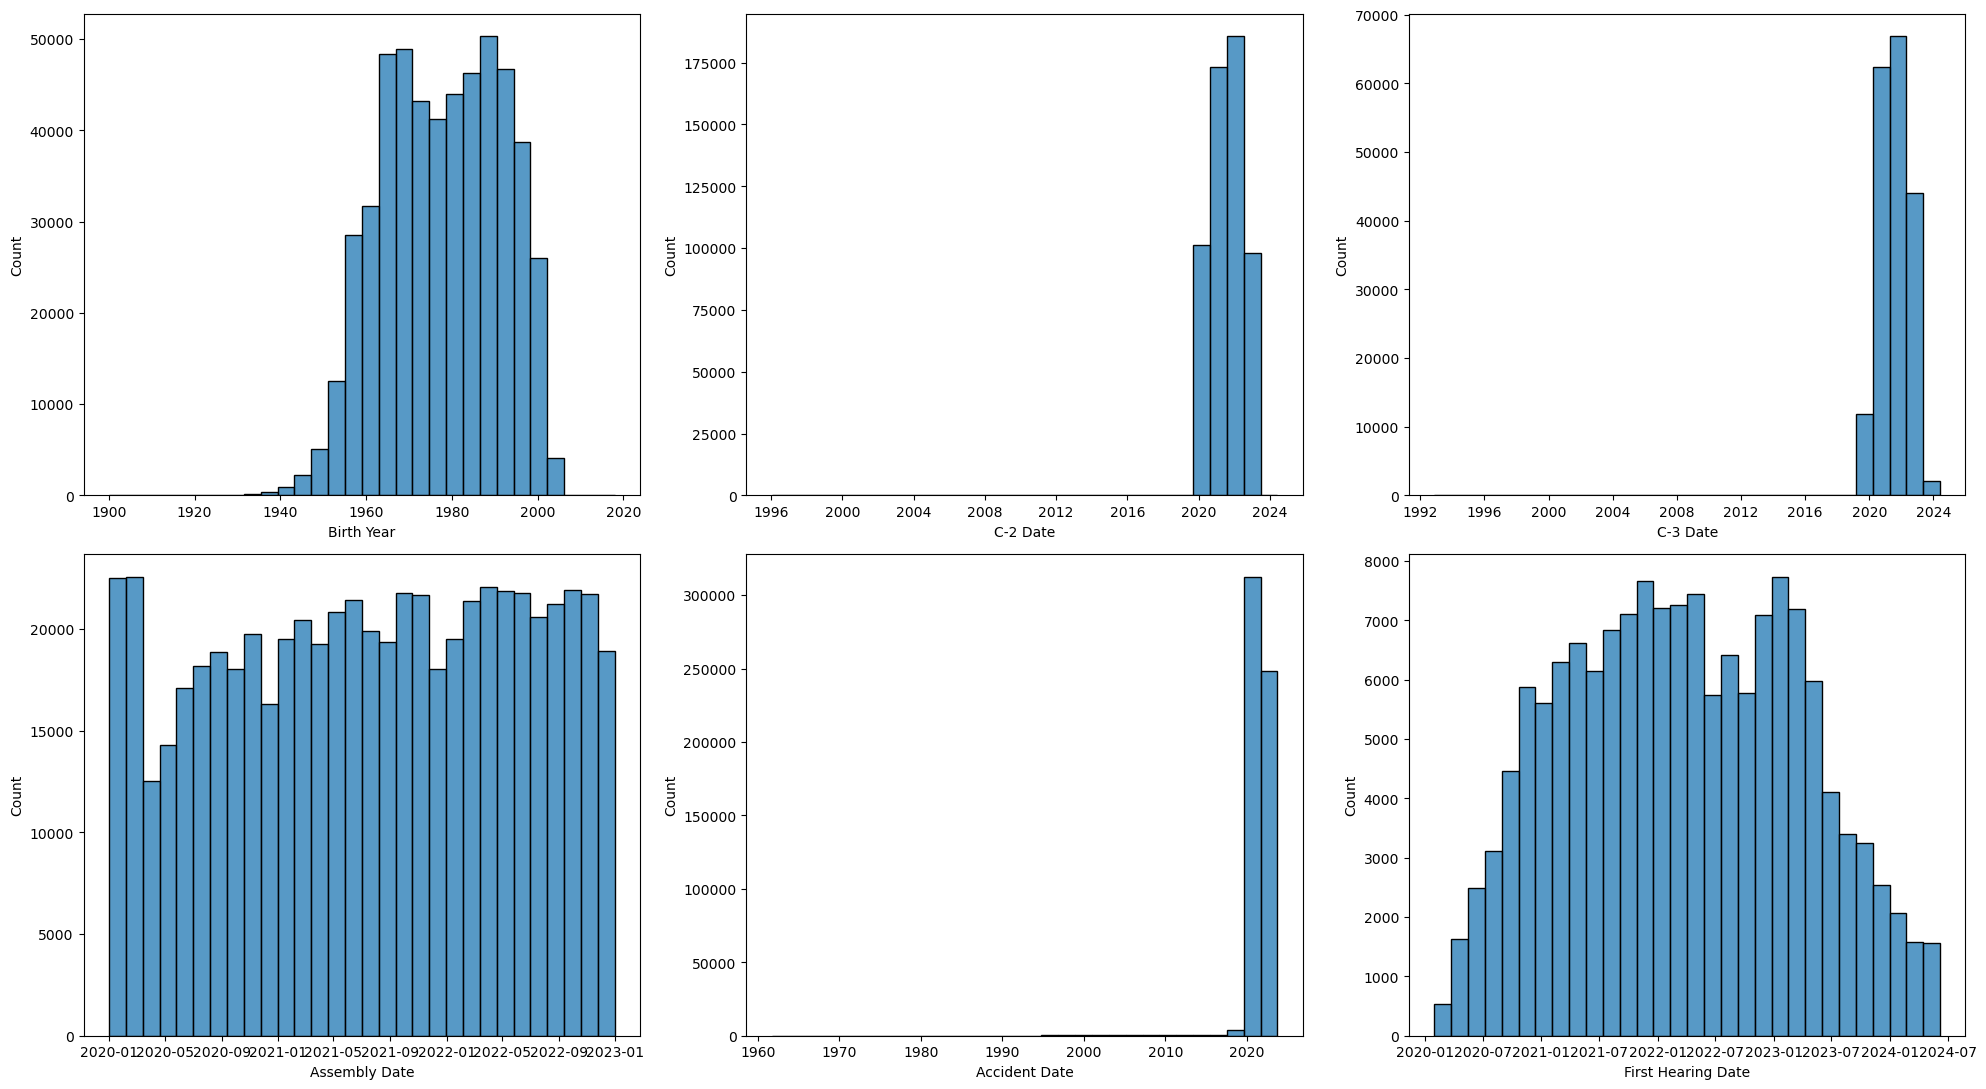

In [22]:
outlier_date = train_data.copy()
for col in outlier_date.columns:
    if 'Date' in col:
        outlier_date[col] = pd.to_datetime(outlier_date[col], format='%Y-%m-%d')
    elif 'Year' in col:
        outlier_date[col] = outlier_date[col].replace(0.0, np.nan)
        outlier_date[col] = pd.to_datetime(outlier_date[col].dropna().astype(int).astype(str), format='%Y', errors='coerce')

features = ['Birth Year','C-2 Date','C-3 Date','Assembly Date','Accident Date','First Hearing Date']

sp_rows = 2
sp_cols = 3

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11), tight_layout=True)

for ax, feat in zip(axes.flatten(), features):
    sns.histplot(outlier_date[feat], ax=ax, bins=30)


title = "Datetime Variables' Histograms"

plt.show()

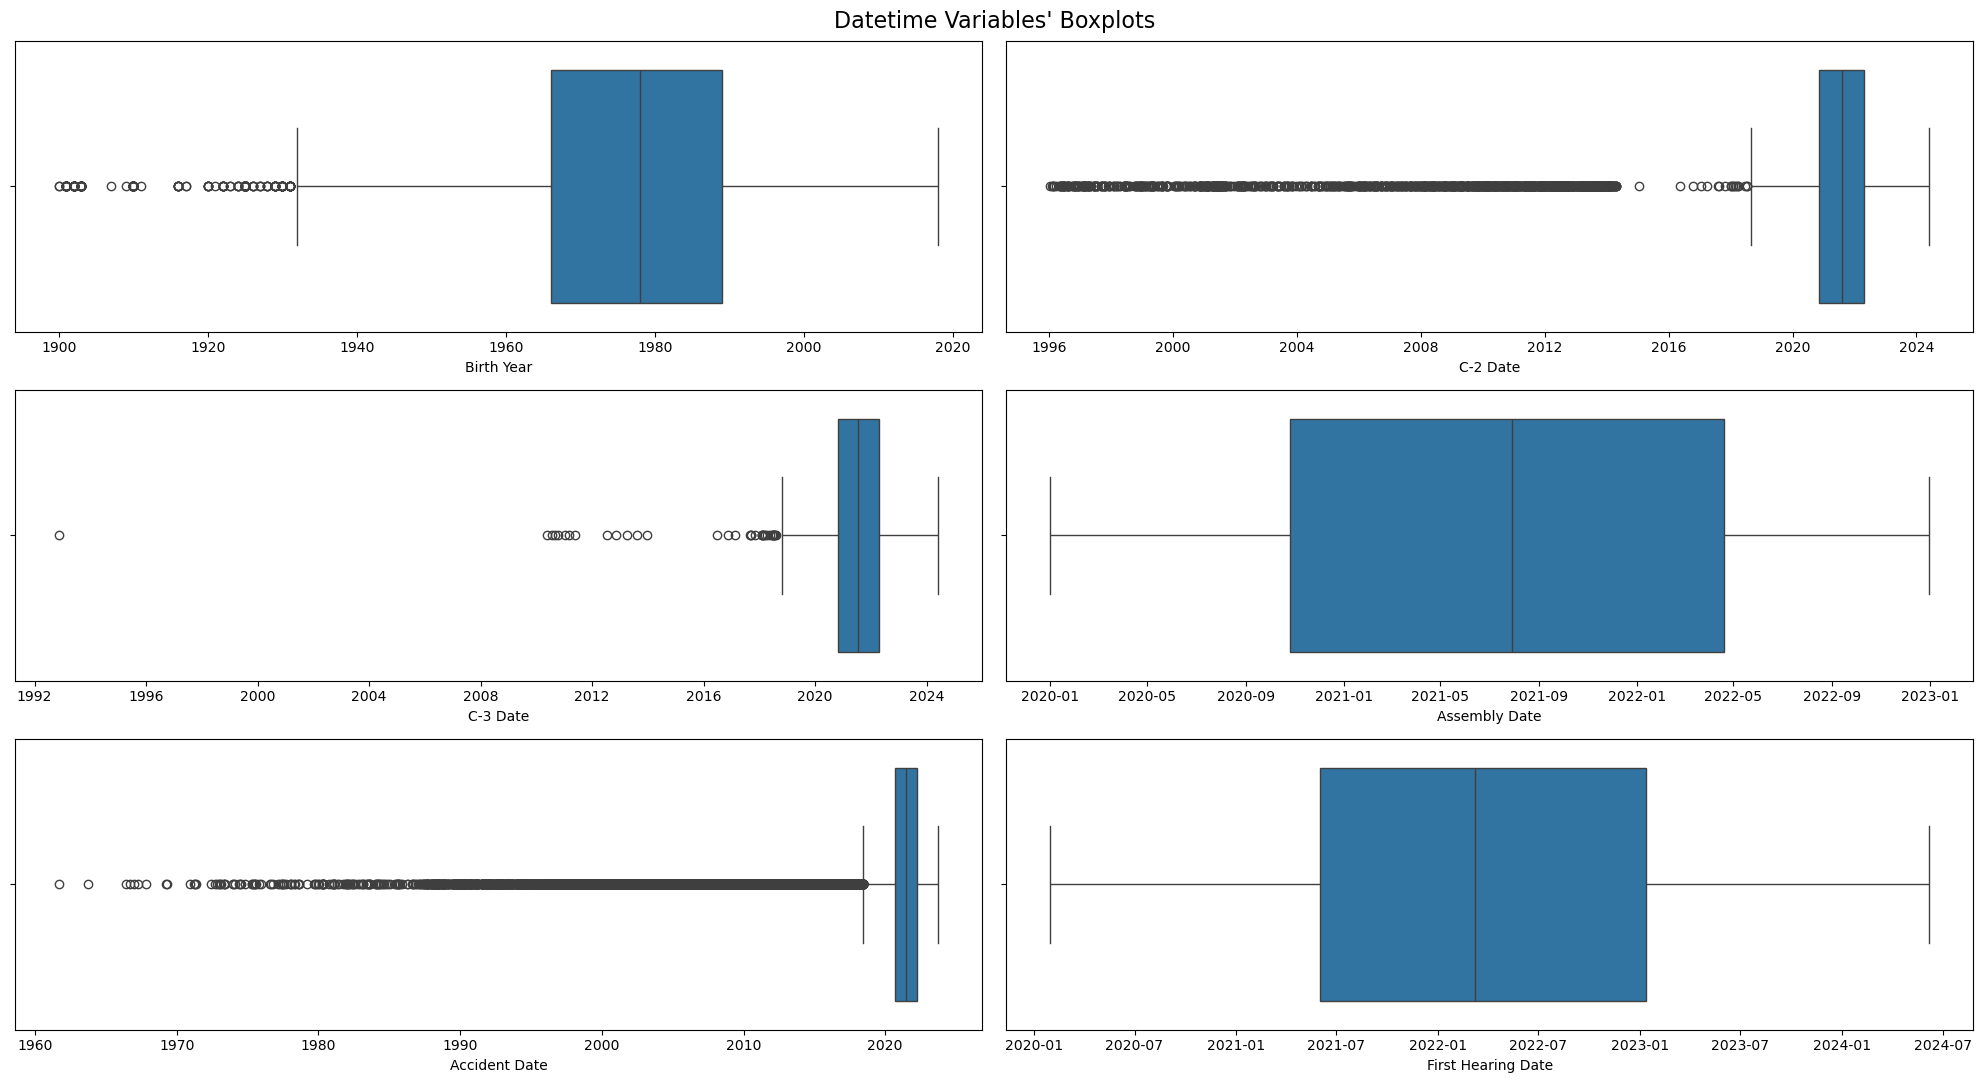

In [23]:
sp_rows = 3
sp_cols = 2

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11), tight_layout=True)

for ax, feat in zip(axes.flatten(), features):
    sns.boxplot(x=outlier_date[feat], ax=ax)


title = "Datetime Variables' Boxplots"
plt.suptitle(title, fontsize=16)
plt.show()

#### Fix Birthday Year Nan


In [24]:
df.isna().sum()

Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Assembly Date                              0
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee Region                     19445
OIICS Nature of Injury Description    593471
WCIO Cause of Injury Code              35085
WCIO Cause

In [25]:
df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,False,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,ST. LAWRENCE,False,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,False,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,True,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,WYOMING,False,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,True,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,False,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,ORANGE,False,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,False,Not Work Related,6.0
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,False,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,DUTCHESS,False,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,False,Not Work Related,1.0


In [26]:
df['Accident Date'].head()

Claim Identifier
5393875      2019-12-30
5393091      2019-08-30
5393889      2019-12-06
957648180           NaN
5393887      2019-12-30
Name: Accident Date, dtype: object

#### to date_time object

In [27]:
# converts the date columns to datetime format
for col in train_data.columns:
    # fist we convert all columns containing the word 'Date' to datetime format
    if 'Date' in col:
        train_data[col] = pd.to_datetime(train_data[col], format='%Y-%m-%d')


train_data

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaT,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaT,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaT,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
957648180,NaT,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaT,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,N,ALBANY,NaT,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327160035,NaT,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6165075,2022-12-13,72.0,N,2022-12-31,N,0.00,1950.0,2022-12-31,NaT,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,2. NON-COMP,SULLIVAN,N,BINGHAMTON,NaT,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,I,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
249875936,NaT,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
def convert_dates_to_timestamps(df):
    """
    Converts all columns in the DataFrame that contain 'Date' in their name
    to timestamps (seconds since epoch).

    Parameters:
    df (pd.DataFrame): The DataFrame containing date columns.

    Returns:
    pd.DataFrame: DataFrame with 'Date' columns converted to timestamps.
    """
    # Create a copy to avoid modifying the original DataFrame
    df = df.copy()

    for col in df.columns:
        if 'Date' in col:
            # Convert the column to datetime, coerce invalid parsing to NaT
            df[col] = pd.to_datetime(df[col], errors='coerce')

#Convert to timestamp only for valid datetime values
            df[col] = df[col].apply(lambda x: x.timestamp() if pd.notnull(x) else np.nan)

    return df

In [29]:
train_data = convert_dates_to_timestamps(train_data)
test_data = convert_dates_to_timestamps(test_data)

train_data.describe(include='all')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
count,5.703370e+05,574026.000000,574026,5.934710e+05,574026,5.453750e+05,544948.000000,5.594660e+05,1.872450e+05,574026,574026,574026,574026,574026,574026,1.507980e+05,574026,132803.000000,564068.000000,564068,574026,0.0,558386.000000,558386,558369.000000,558369,556944.000000,556944,545389,574026.000000,574026,574026.000000
unique,NaN,NaN,3,NaN,2,NaN,NaN,NaN,NaN,2046,8,8,63,2,8,NaN,4,NaN,NaN,20,5,NaN,NaN,74,NaN,56,NaN,54,10060,NaN,1,NaN
top,NaN,NaN,N,NaN,N,NaN,NaN,NaN,NaN,STATE INSURANCE FUND,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,NYC,NaN,M,NaN,NaN,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,NaN,LIFTING,NaN,STRAIN OR TEAR,NaN,LOWER BACK AREA,11236,NaN,Not Work Related,NaN
freq,NaN,NaN,571412,NaN,392291,NaN,NaN,NaN,NaN,111144,285368,291078,60430,546505,270779,NaN,335218,NaN,NaN,114339,265981,NaN,NaN,46610,NaN,153373,NaN,51862,3302,NaN,574026,NaN
mean,1.619644e+09,42.114270,NaN,1.626665e+09,NaN,4.910883e+02,1886.767604,1.626466e+09,1.627335e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.647666e+09,NaN,3.207337,58.645305,NaN,NaN,NaN,54.381143,NaN,41.013839,NaN,39.738146,NaN,NaN,0.046665,NaN,3.006559
std,5.908936e+07,14.256432,NaN,2.721032e+07,NaN,6.092918e+03,414.644423,3.513655e+07,2.832608e+07,NaN,NaN,NaN,NaN,NaN,NaN,3.144186e+07,NaN,2.832303,19.644175,NaN,NaN,NaN,25.874281,NaN,22.207521,NaN,22.365940,NaN,NaN,0.210921,NaN,2.000801
min,-2.625696e+08,0.000000,NaN,1.577837e+09,NaN,0.000000e+00,0.000000,8.214048e+08,7.216128e+08,NaN,NaN,NaN,NaN,NaN,NaN,1.580342e+09,NaN,1.000000,11.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,-9.000000,NaN,NaN,0.000000,NaN,0.000000
25%,1.600042e+09,31.000000,NaN,1.603670e+09,NaN,0.000000e+00,1965.000000,1.604621e+09,1.603757e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.622506e+09,NaN,1.000000,45.000000,NaN,NaN,NaN,31.000000,NaN,16.000000,NaN,33.000000,NaN,NaN,0.000000,NaN,1.000000
50%,1.624752e+09,42.000000,NaN,1.627517e+09,NaN,0.000000e+00,1977.000000,1.628467e+09,1.626826e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.646784e+09,NaN,2.000000,61.000000,NaN,NaN,NaN,56.000000,NaN,49.000000,NaN,38.000000,NaN,NaN,0.000000,NaN,3.000000
75%,1.647821e+09,54.000000,NaN,1.650326e+09,NaN,8.410000e+02,1989.000000,1.650931e+09,1.650413e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.673395e+09,NaN,4.000000,71.000000,NaN,NaN,NaN,75.000000,NaN,52.000000,NaN,53.000000,NaN,NaN,0.000000,NaN,5.000000


---

### 2.1.8 Feature Engineering

## 3. Data Preprocessing

### Empty rows
In the initial analysis we saw that the only features that has no missing values is `_Assembly Date_`. So let's check how many rows only have that feature filled and the rest of columns empty

In [30]:
train_data = train_data[~(train_data.drop(columns=['Assembly Date']).isna().all(axis=1) & train_data['Assembly Date'].notna())]
X_test = test_data[~(test_data.drop(columns=['Assembly Date']).isna().all(axis=1) & test_data['Assembly Date'].notna())]

In [31]:
only_assembly_date = train_data.drop(columns=['Assembly Date']).isnull().all(axis=1) & df['Assembly Date'].notnull()


num_only_assembly_date_filled = only_assembly_date.sum()
print(f"Number of rows with only 'Assembly Date' filled: {num_only_assembly_date_filled}")

Number of rows with only 'Assembly Date' filled: 0


### Result:

In [32]:
# rows_removed = train_data.shape[0] - X.shape[0]
# rows_removed_percentage = rows_removed / train_data.shape[0] * 100  

# features_removed = train_data.shape[1] - X.shape[1]
# features_removed_percentage = features_removed / train_data.shape[1] * 100 

# print(f"Rows removed: {rows_removed} ({rows_removed_percentage:.2f}%)")
# print(f"Features removed: {features_removed} ({features_removed_percentage:.2f}%)") 

### Independent and Dependent variables

In [33]:
X = train_data.drop(columns=['Claim Injury Type', 'WCB Decision', 'Agreement Reached'])
y = train_data['Claim Injury Type']
wcb_decision = train_data['WCB Decision']
agreement_reached = train_data['Agreement Reached']

----

In [34]:
y.isna().sum()

0

### Train and Validation Split

In [35]:
# split the data into training and testing sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

#### OIICS Nature of Injury Description
Between all the complains this feature is never filled, so we can drop it

In [36]:
# drop OIICS Nature of Injury Description
X_train = X_train.drop(columns=['OIICS Nature of Injury Description'])
X_val = X_val.drop(columns=['OIICS Nature of Injury Description'])
X_test = X_test.drop(columns=['OIICS Nature of Injury Description'])


----

## 3.1 Numerical Features Preprocessing

In [37]:
# Step 1.
# Identifying Numerical features
numerical_features = X.select_dtypes(include=['number']).columns
numerical_features

Index(['Accident Date', 'Age at Injury', 'Assembly Date',
       'Average Weekly Wage', 'Birth Year', 'C-2 Date', 'C-3 Date',
       'First Hearing Date', 'IME-4 Count', 'Industry Code',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Number of Dependents'],
      dtype='object')

In [38]:
X[numerical_features].isna().sum()/df.shape[0]*100
# IME-4 count has a failry high NA percentage, but since the meaning of it could be usefull for later exploration I kept it. 
## Because IME-4 stands for "Independent Examiner's Report of Independent Medical Examination” 

# Other's have low scores, but instead of deleting them I will change them via either mean or median strategy. 
# Online I read if more than 60-70% is missing we drop the variable and we never try to fill in more than 5%. for now I filled in all via either mean or median. 
# But I could also drop some. I wanted to ask you guys about it. 

Accident Date                          0.621597
Age at Injury                          0.000000
Assembly Date                          0.000000
Average Weekly Wage                    4.827700
Birth Year                             4.899650
C-2 Date                               2.453363
C-3 Date                              65.172687
First Hearing Date                    71.314015
IME-4 Count                           74.346177
Industry Code                          1.677925
OIICS Nature of Injury Description    96.723513
WCIO Cause of Injury Code              2.635344
WCIO Nature of Injury Code             2.638208
WCIO Part Of Body Code                 2.878321
Number of Dependents                   0.000000
dtype: float64

In [39]:
numerical_features = numerical_features.drop(
    [col for col in numerical_features if 'Code' in col or 'Description' in col]
)

numerical_features

Index(['Accident Date', 'Age at Injury', 'Assembly Date',
       'Average Weekly Wage', 'Birth Year', 'C-2 Date', 'C-3 Date',
       'First Hearing Date', 'IME-4 Count', 'Number of Dependents'],
      dtype='object')

In [40]:
preProcess_numerical_train = X_train[numerical_features].copy()
preProcess_numerical_val = X_val[numerical_features].copy()
preProcess_numerical_test = X_test[numerical_features].copy()

In [41]:
preProcess_numerical_train[numerical_features].isna().sum()

Accident Date             2956
Age at Injury                0
Assembly Date                0
Average Weekly Wage      22976
Birth Year               23242
C-2 Date                 11635
C-3 Date                309565
First Hearing Date      338679
IME-4 Count             353032
Number of Dependents         0
dtype: int64

In [42]:
# Combine Zip code and Industry Code to base of the weekly wage. 
preProcess_numerical_train

,Accident Date,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,First Hearing Date,IME-4 Count,Number of Dependents
Claim Identifier,,,,,,,,,,
5785935,1.628122e+09,49.0,1.628554e+09,744.06,1971.0,1.628554e+09,1.630282e+09,NaN,2.0,6.0
6090033,1.663114e+09,56.0,1.663718e+09,845.29,1966.0,1.663718e+09,1.664237e+09,1.684195e+09,7.0,5.0
6136197,1.667779e+09,48.0,1.668730e+09,0.00,1974.0,1.668730e+09,NaN,NaN,NaN,2.0
6019545,1.599005e+09,55.0,1.655770e+09,0.00,0.0,1.655770e+09,1.647389e+09,NaN,NaN,2.0
5792247,1.628813e+09,53.0,1.629245e+09,668.08,1968.0,1.629245e+09,1.638230e+09,1.695600e+09,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...
5837651,1.634256e+09,26.0,1.634602e+09,1244.56,1995.0,1.634602e+09,1.636502e+09,1.642982e+09,1.0,6.0
5781926,1.627430e+09,55.0,1.628035e+09,969.26,NaN,1.628035e+09,1.629331e+09,1.646611e+09,7.0,1.0
5890060,1.636589e+09,57.0,1.641254e+09,794.09,1964.0,1.641254e+09,NaN,NaN,NaN,5.0


Imputing Average Weekly wage

In [43]:
# Step 1 Weekly Wage imputing
mean_wage_by_zip_industry = X_train.groupby(['Zip Code', 'Industry Code'])['Average Weekly Wage'].mean()

In [44]:
# Step 2 Weekly Wage Imputing
def impute_weekly_wage(row):
    # Check if "Average Weekly Wage" is missing
    if pd.isnull(row['Average Weekly Wage']):
        # Try to get the mean wage for the specific combination of Zip Code and Industry Code
        return mean_wage_by_zip_industry.get((row['Zip Code'], row['Industry Code']), np.nan)
    else:
        # Return the original value if not missing
        return row['Average Weekly Wage']

In [45]:
# Step 3 Apply the imputation function on X_train, X_val, and X_test
preProcess_numerical_train['Average Weekly Wage'] = X_train.apply(impute_weekly_wage, axis=1)
preProcess_numerical_val['Average Weekly Wage'] = X_val.apply(impute_weekly_wage, axis=1)
preProcess_numerical_test['Average Weekly Wage'] = X_test.apply(impute_weekly_wage,axis=1)

In [46]:
# Step 4 Check sum of Na’s
preProcess_numerical_train[numerical_features].isna().sum()

Accident Date             2956
Age at Injury                0
Assembly Date                0
Average Weekly Wage       2520
Birth Year               23242
C-2 Date                 11635
C-3 Date                309565
First Hearing Date      338679
IME-4 Count             353032
Number of Dependents         0
dtype: int64

In [47]:
# Than it is the decision to either drop the rest or to it the following way. 
impute_strategy = {
    'Number of Dependents': 'mean',  # Use mean and optionally round if whole numbers are needed
    'Average Weekly Wage': 'median',
    'Age at Injury': 'median', 
}
## apply for birth year 
## invistigate agreement reached
# Only we might need a predictive model which looks at all the NA's from features and predicts more the values? 
# Since Cause of Injury Code and Nature of Injury Code and Part of Body Code might be related. 

In [48]:
# Loop through each column and apply the specified imputation method
for col, strategy in impute_strategy.items():
    if strategy == 'mean':
        # Apply the mean and round for "Number of Dependents" specifically
        if col == 'Number of Dependents':
            train_mean = preProcess_numerical_train[col].mean()
            preProcess_numerical_train[col].fillna(round(train_mean), inplace=True)
            preProcess_numerical_val[col].fillna(round(train_mean), inplace=True)
            preProcess_numerical_test[col].fillna(round(train_mean), inplace=True)
            
        else:
            train_mean = preProcess_numerical_train[col].mean()
            preProcess_numerical_train[col].fillna(round(train_mean), inplace=True)
            preProcess_numerical_val[col].fillna(round(train_mean), inplace=True)
            preProcess_numerical_test[col].fillna(round(train_mean), inplace=True)

    elif strategy == 'median':

        train_median = preProcess_numerical_train[col].median()
        preProcess_numerical_train[col].fillna(train_median, inplace=True)
        preProcess_numerical_val[col].fillna(train_median, inplace=True)
        preProcess_numerical_test[col].fillna(train_median, inplace=True)

    elif strategy == 'mode':
        train_mode = preProcess_numerical_train[col].mode()[0]
        preProcess_numerical_train[col].fillna(train_mode, inplace=True)  # Mode returns an array, use [0] to get the value
        preProcess_numerical_val[col].fillna(train_mode, inplace=True)
        
        if col != 'Agreement Reached':
            preProcess_numerical_test[col].fillna(train_mode, inplace=True)

C:\Users\inesm\AppData\Local\Temp\ipykernel_7824\571016926.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  preProcess_numerical_train[col].fillna(round(train_mean), inplace=True)
C:\Users\inesm\AppData\Local\Temp\ipykernel_7824\571016926.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

IME-4 Count

In [49]:
preProcess_numerical_train["IME-4 Count"].unique()

array([ 2.,  7., nan,  6.,  3.,  4.,  5.,  1.,  8., 14., 11., 12., 10.,
       15.,  9., 13., 34., 19., 16., 24., 20., 18., 17., 27., 30., 21.,
       23., 22., 26., 25., 29., 32., 36., 28., 31., 39., 73., 33., 48.,
       47., 35., 37.])

IME-4 does not have 0 as values therefore imputin NaN with 0

In [50]:
preProcess_numerical_train["IME-4 Count"].fillna(0, inplace=True)
preProcess_numerical_val["IME-4 Count"].fillna(0, inplace=True)
preProcess_numerical_test["IME-4 Count"].fillna(0, inplace=True)

C:\Users\inesm\AppData\Local\Temp\ipykernel_7824\1382865679.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  preProcess_numerical_train["IME-4 Count"].fillna(0, inplace=True)
C:\Users\inesm\AppData\Local\Temp\ipykernel_7824\1382865679.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [51]:
print(preProcess_numerical_train[numerical_features].isnull().sum())

Accident Date             2956
Age at Injury                0
Assembly Date                0
Average Weekly Wage          0
Birth Year               23242
C-2 Date                 11635
C-3 Date                309565
First Hearing Date      338679
IME-4 Count                  0
Number of Dependents         0
dtype: int64


## 3.2 Outliers Treatment

Probably gets moved to the end of preprocessing

In [52]:

# ### check outliers after handling every missing values  IMPORTANT1!!!!!!
# from scipy.stats import zscore
# import numpy as np

# # Define a function to handle outliers based on each feature's characteristics
# def handle_outliers(data, features):
#     for col in features:
#         if data[col].skew() > 1:  # Skewed distribution, use IQR
#             Q1 = data[col].quantile(0.25)
#             Q3 = data[col].quantile(0.75)
#             IQR = Q3 - Q1
#             lower_bound = Q1 - 1.5 * IQR
#             upper_bound = Q3 + 1.5 * IQR
#             # Clip the values outside the IQR range
#             data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
#             print(f"Outliers in {col} handled using IQR method. Bounds: ({lower_bound}, {upper_bound})")
        
#         elif abs(data[col].skew()) <= 1:  # Symmetrical or normal distribution, use Z-score
#             z_scores = zscore(data[col].dropna())  # Drop NaN for Z-score calculation
#             outliers = data[(z_scores > 3) | (z_scores < -3)].index
#             # Mark or handle outliers (e.g., setting to NaN or capping)
#             data.loc[outliers, col] = np.nan  # Optionally, fill with NaN or use another method
#             print(f"Outliers in {col} handled using Z-score method.")

In [53]:

# # Apply the function to numerical features
# handle_outliers(preProcess_numerical_train, ['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']) 
# preProcess_numerical_train[['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']].shape


### Result:

In [54]:
features_imputed = X[numerical_features].isna().sum() - preProcess_numerical_train[numerical_features].isna().sum()

print(f'Numerical features imputed: {features_imputed.sum()}')

Numerical features imputed: 641133


In [55]:
X_train[numerical_features] = preProcess_numerical_train[numerical_features]
X_val[numerical_features] = preProcess_numerical_val[numerical_features]
X_test[numerical_features] = preProcess_numerical_test[numerical_features]

## 3.3 Categorical Features Preprocessing

### Overlook of the features
This notebook will include pre processing of the following variables:
- Carrier Name 
- Attorney Representative
- OIICS Nature of Injury Description
- Industry Code
- Industry Code Description
- Medical Fee Region
- C-2 Date
- First Hearing Date
- WCIO Cause of Injury Description
- WCIO Cause of Injury Code
- WCIO Part of Body Code
- WCIO Part of Body Description
- WCIO Cause of Injury Code
- WCIO Cause of Injury Description
- WCIO Nature of Injury Description
- WCIO Nature of Injury Code

Since we dropped some rows in the previous section we should check again for the updated number of missing values for the features we are interest in

In [56]:
target_features = ['Carrier Name', 'Attorney/Representative',
                   'Industry Code','Industry Code Description', 'Medical Fee Region', 'C-2 Date', 'First Hearing Date','WCIO Cause of Injury Code','WCIO Cause of Injury Description',
                   'WCIO Part Of Body Code','WCIO Part Of Body Description','WCIO Cause of Injury Description','WCIO Cause of Injury Code','WCIO Nature of Injury Description',]

In [57]:
preProcess_categorical1_train = X_train.copy()
preProcess_categorical1_val = X_val.copy()
preProcess_categorical1_test = X_test.copy()

In [58]:
preProcess_categorical1_train[target_features].isnull().sum()/X.shape[0]*100

Carrier Name                          0.000000
Attorney/Representative               0.000000
Industry Code                         1.389484
Industry Code Description             1.389484
Medical Fee Region                    0.000000
C-2 Date                              2.026912
First Hearing Date                   59.000638
WCIO Cause of Injury Code             2.176556
WCIO Cause of Injury Description      2.176556
WCIO Part Of Body Code                2.371147
WCIO Part Of Body Description         2.371147
WCIO Cause of Injury Description      2.176556
WCIO Cause of Injury Code             2.176556
WCIO Nature of Injury Description     2.179170
dtype: float64

The features _`Carrier Name`_,  _`Attorney/Representative`_ and _`Medical Fee Region`_ no longer have missing values. Let's look at the others

### First Hearing Date
This feature also has a high percentage of missing values. According to the provided information for this project, 'A blank date means the claim has not yet had a hearing held'. So we should create a label for the ones that hadn't had a hearing yet, we will simply call it 'N/A'

In [59]:
# transform First Hearing Date into pd.datetime
preProcess_categorical1_train['First Hearing Date'] = pd.to_datetime(preProcess_categorical1_train['First Hearing Date'])
preProcess_categorical1_val['First Hearing Date'] = pd.to_datetime(preProcess_categorical1_val['First Hearing Date'])
preProcess_categorical1_test['First Hearing Date'] = pd.to_datetime(preProcess_categorical1_test['First Hearing Date'])

In [60]:
preProcess_categorical1_train['First Hearing Date'].isna().sum()

338679

To assist in the information that this feature can provide we can create another feature called _`Has First Hearing Date`_ - a binary value that indicates if the user has had it's first hearing date

In [61]:
# create Has First Hearing Date based on if is 'N/A' or not
preProcess_categorical1_train['Has First Hearing Date'] = preProcess_categorical1_train['First Hearing Date'].apply(lambda x: 0 if x == np.nan else 1)
preProcess_categorical1_val['Has First Hearing Date'] = preProcess_categorical1_val['First Hearing Date'].apply(lambda x: 0 if x == np.nan else 1)
preProcess_categorical1_test['Has First Hearing Date'] = preProcess_categorical1_test['First Hearing Date'].apply(lambda x: 0 if x == np.nan else 1)


In [62]:
preProcess_categorical1_train['Has First Hearing Date'].value_counts()

Has First Hearing Date
1    459220
Name: count, dtype: int64

### C-2 Date
Fill with mean and create new binary feature

In [63]:
preProcess_categorical1_train['Has C-2 Date'] = preProcess_categorical1_train['C-2 Date'].apply(lambda x: 0 if pd.isna(x) else 1)
preProcess_categorical1_val['Has C-2 Date'] = preProcess_categorical1_val['C-2 Date'].apply(lambda x: 0 if pd.isna(x) else 1)
preProcess_categorical1_test['Has C-2 Date'] = preProcess_categorical1_test['C-2 Date'].apply(lambda x: 0 if pd.isna(x) else 1)


print((preProcess_categorical1_train['Has C-2 Date'] == 0).sum())

mean_accident_date = preProcess_categorical1_train['C-2 Date'].mean()

# Fill NaN values in 'accident_date' with the calculated mean date for each set
preProcess_categorical1_train['C-2 Date'].fillna(mean_accident_date, inplace=True)
preProcess_categorical1_val['C-2 Date'].fillna(mean_accident_date, inplace=True)
preProcess_categorical1_test['C-2 Date'].fillna(mean_accident_date, inplace=True)


11635


C:\Users\inesm\AppData\Local\Temp\ipykernel_7824\4293152391.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  preProcess_categorical1_train['C-2 Date'].fillna(mean_accident_date, inplace=True)
C:\Users\inesm\AppData\Local\Temp\ipykernel_7824\4293152391.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

### Codes and Descriptions
This section will analyse data related to codes and their descriptions

In [64]:
df_codes = preProcess_categorical1_train[[col for col in preProcess_categorical1_train.columns if 'Code' in col]]
df_codes.drop(columns=['Industry Code Description', 'Zip Code'], inplace=True)

df_description = preProcess_categorical1_train[[col for col in preProcess_categorical1_train.columns if 'Description' in col]]

C:\Users\inesm\AppData\Local\Temp\ipykernel_7824\2876846187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_codes.drop(columns=['Industry Code Description', 'Zip Code'], inplace=True)


In [65]:
# ensure that all codes are objects
df_codes = df_codes.astype('object')

df_codes.describe()

,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code
count,451244.0,446726.0,446711.0,445609.0
unique,24.0,77.0,56.0,57.0
top,62.0,56.0,52.0,42.0
freq,91355.0,37240.0,122778.0,41395.0


In [66]:
#check the order of the codes
df_codes.columns

Index(['Industry Code', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code'],
      dtype='object')

In [67]:
#check the order of the descriptions
df_description.columns

Index(['Industry Code Description', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Description'],
      dtype='object')

In [68]:
def code_description_consistency(df, code_column, description_column):
    # Remove rows with missing values in either the code or description columns
    df_non_null = df.dropna(subset=[code_column, description_column])

    # Check if each code maps to a unique description
    code_consistency = df_non_null.groupby(code_column)[description_column].nunique() == 1

    # Check if each description maps to a unique code
    description_consistency = df_non_null.groupby(description_column)[code_column].nunique() == 1

    # Check overall consistency
    codes_match_descriptions = code_consistency.all()
    descriptions_match_codes = description_consistency.all()

    return codes_match_descriptions, descriptions_match_codes

In [69]:
for code_col, desc_col in zip(df_codes.columns, df_description.columns):
    # Get the consistency check result
    result = code_description_consistency(preProcess_categorical1_train, code_col, desc_col)
    
    # Print the names of the columns along with the result
    print(f"Checking consistency between '{code_col}' and '{desc_col}': {result}")

Checking consistency between 'Industry Code' and 'Industry Code Description': (True, False)
Checking consistency between 'WCIO Cause of Injury Code' and 'WCIO Cause of Injury Description': (True, False)
Checking consistency between 'WCIO Nature of Injury Code' and 'WCIO Nature of Injury Description': (True, True)
Checking consistency between 'WCIO Part Of Body Code' and 'WCIO Part Of Body Description': (True, False)


So codes match the same description but the same does not happen for the description since we have the same description in different codes

In [70]:
# for code_col, desc_col in zip(df_codes.columns, df_description.columns):    
#     code_column = code_col
#     description_column = desc_col

#     # Count occurrences of each code/description pair
#     code_description_counts = X_train.groupby([code_column, description_column]).size().reset_index(name='Count').sort_index()

#     # Plotting
#     plt.figure(figsize=(12, 8))
#     plt.bar(
#         x=code_description_counts[code_column].astype(str) + ' / ' + code_description_counts[description_column],
#         height=code_description_counts['Count'],
#         color='skyblue'
#     )

#     # Formatting the plot
#     plt.xlabel(f"{code_column} / {description_column}")
#     plt.ylabel("Frequency")
#     plt.title(f"Frequency of {code_column} and {description_column} Pairs")
#     plt.xticks(rotation=90)
#     plt.tight_layout()
#     plt.show()

We can use the mode to fill the missing values (copied out because already done)

In [71]:
def fill_missing_with_mode(df, columns):
    """
    Fill missing values in a code column with the most frequent code.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - code (str): The name of the column representing codes.
    
    Returns:
    - pd.DataFrame: The DataFrame with missing values in the code column filled.
    """
    # Find the most frequent code
    for column in columns:
        most_frequent_code = df[column].mode().iloc[0]  # Get the mode (most frequent value)
        
        # Use .loc to avoid SettingWithCopyWarning and fill NaNs
        df.loc[:, column] = df[column].fillna(most_frequent_code)
    
    # Use .infer_objects to avoid FutureWarning if dtype downcasting is a concern
    df = df.infer_objects(copy=False)
    
    return df

In [72]:
# codes_columns = df_codes.columns.tolist()
# description_columns = df_description.columns.tolist()

# # fill missing values in df_codes and df_description separately
# preProcess_categorical1 = fill_missing_with_mode(preProcess_categorical1, codes_columns)
# preProcess_categorical1 = fill_missing_with_mode(preProcess_categorical1, description_columns)

# # fill missing values for test data
# X_test = fill_missing_with_mode(X_test, codes_columns)
# X_test = fill_missing_with_mode(X_test, description_columns)

In [73]:
def compute_most_frequent_code_per_description(df, code_columns):
    # List to store results as tuples of (description, most_frequent_code) per column
    results = {}

    for code_col in code_columns:
        description_col = code_col.replace('code', 'description')
        
        # Calculate most frequent code for each unique description
        most_frequent_code_series = (
            df.groupby(description_col)[code_col]
            .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
        )
        
        # Convert to numpy array
        results[code_col] = np.array(
            list(zip(most_frequent_code_series.index, most_frequent_code_series.values)),
            dtype=[('description', 'O'), ('most_frequent_code', 'O')]
        )

    return results

In [74]:
def fill_missing_codes(df, code_columns, most_frequent_code_arrays):
    for code_col in code_columns:
        description_col = code_col.replace('code', 'description')
        
        # Extract the numpy array for the current code column
        most_frequent_array = most_frequent_code_arrays[code_col]

        # Map description values to their most frequent codes using numpy indexing
        description_to_code = {desc: code for desc, code in most_frequent_array}

        # Fill missing values in the DataFrame using numpy structure
        df[code_col] = df.apply(
            lambda row: (
                description_to_code.get(row[description_col], row[code_col])
                if pd.isna(row[code_col]) and not pd.isna(row[description_col]) else row[code_col]
            ),
            axis=1
        )

    df = df.infer_objects(copy=False)
    return df

In [75]:
codes_columns = df_codes.columns.tolist()

# fill missing values in df_codes
preProcess_categorical1_train = fill_missing_codes(preProcess_categorical1_train, codes_columns, compute_most_frequent_code_per_description(preProcess_categorical1_train, codes_columns))

# fill missing values for validation data
preProcess_categorical1_val = fill_missing_codes(preProcess_categorical1_val, codes_columns, compute_most_frequent_code_per_description(preProcess_categorical1_val, codes_columns))


# fill missing values for test data
preProcess_categorical1_test = fill_missing_codes(preProcess_categorical1_test, codes_columns, compute_most_frequent_code_per_description(preProcess_categorical1_test, codes_columns))


In [76]:
description_columns = df_description.columns.tolist()

# fill missing values in df_codes 
preProcess_categorical1 = fill_missing_with_mode(preProcess_categorical1_train, codes_columns)
preProcess_categorical1 = fill_missing_with_mode(preProcess_categorical1_val, codes_columns)
preProcess_categorical1 = fill_missing_with_mode(preProcess_categorical1_test, codes_columns)

### Results Cat 1:

In [77]:
features_imputed = X[target_features].isna().sum() - preProcess_categorical1_train[target_features].isna().sum()
print(f'Categorical features imputed: {features_imputed.sum()}')

print(preProcess_categorical1_train[target_features].isna().sum())

Categorical features imputed: 172322
Carrier Name                              0
Attorney/Representative                   0
Industry Code                             0
Industry Code Description              7976
Medical Fee Region                        0
C-2 Date                                  0
First Hearing Date                   338679
WCIO Cause of Injury Code                 0
WCIO Cause of Injury Description      12494
WCIO Part Of Body Code                    0
WCIO Part Of Body Description         13611
WCIO Cause of Injury Description      12494
WCIO Cause of Injury Code                 0
WCIO Nature of Injury Description     12509
dtype: int64


In [78]:
X_train = preProcess_categorical1_train

X_val = preProcess_categorical1_val

X_test = preProcess_categorical1_test

In [79]:
X_train.isna().sum()

Accident Date                          2956
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                       0
Birth Year                            23242
C-2 Date                                  0
C-3 Date                             309565
Carrier Name                              0
Carrier Type                              0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   338679
Gender                                    0
IME-4 Count                               0
Industry Code                             0
Industry Code Description              7976
Medical Fee Region                        0
WCIO Cause of Injury Code                 0
WCIO Cause of Injury Description      12494
WCIO Nature of Injury Code      

## Preprocessing Catergorical 2:

#### preprocessing categorical data

In [80]:
list_column_analyze = ['Carrier Type'
                       ,'Gender'
                       ,'COVID-19 Indicator'
                       ,'C-3 Date'
                       ,'Alternative Dispute Resolution'
                       ,'Zip Code'
                       ,'County of Injury'
                       ,'Accident Date'
                       ,'District Name'
                       ,'Assembly Date'
                       ,'C-2 Date']

preProcess_categorical2_train = X_train[list_column_analyze].copy()
preProcess_categorical2_val = X_val[list_column_analyze].copy()
preProcess_categorical2_test = X_test[list_column_analyze].copy()
# # put every column that are object to higher case to ensure data consistency and avoid duplicates
# preProcess_categorical2.loc[:, preProcess_categorical2.select_dtypes(include=['object']).columns] = \
#     preProcess_categorical2.select_dtypes(include=['object']).apply(lambda x: x.str.upper())

In [81]:
# reset index otherwise with the groupby the index will be lost
preProcess_categorical2_train = preProcess_categorical2_train.reset_index()
preProcess_categorical2_val = preProcess_categorical2_val.reset_index()
preProcess_categorical2_test = preProcess_categorical2_test.reset_index()


In [82]:
preProcess_categorical2_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459220 entries, 0 to 459219
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Claim Identifier                459220 non-null  int64  
 1   Carrier Type                    459220 non-null  object 
 2   Gender                          459220 non-null  object 
 3   COVID-19 Indicator              459220 non-null  object 
 4   C-3 Date                        149655 non-null  float64
 5   Alternative Dispute Resolution  459220 non-null  object 
 6   Zip Code                        436392 non-null  object 
 7   County of Injury                459220 non-null  object 
 8   Accident Date                   456264 non-null  float64
 9   District Name                   459220 non-null  object 
 10  Assembly Date                   459220 non-null  float64
 11  C-2 Date                        459220 non-null  float64
dtypes: float64(4), i

In [83]:
preProcess_categorical2_train.describe(include= 'object').T

,count,unique,top,freq
Carrier Type,459220,8,1A. PRIVATE,228421
Gender,459220,4,M,268208
COVID-19 Indicator,459220,2,N,437151
Alternative Dispute Resolution,459220,3,N,457133
Zip Code,436392,9143,11236,2646
County of Injury,459220,63,SUFFOLK,48379
District Name,459220,8,NYC,216838


### zip code

In [84]:
# Calculate mode Zip Codes for each group
mode_zip_codes_train = preProcess_categorical2_train.groupby(['County of Injury', 'District Name'])['Zip Code'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
mode_zip_district_train = preProcess_categorical2_train.groupby('District Name')['Zip Code'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
mode_zip_district_train.columns = ['District Name', 'Zip Code_mode_district']

# Apply the mode filling strategy on each dataset
for i, dataset in enumerate([preProcess_categorical2_test, preProcess_categorical2_val, preProcess_categorical2_train]):
    # Merge with mode_zip_codes based on County of Injury and District Name
    dataset = dataset.merge(
        mode_zip_codes_train,
        on=['County of Injury', 'District Name'],
        how='left',
        suffixes=('', '_mode')
    )

    # Fill missing Zip Code values with the mode values from preProcess_categorical2_train
    dataset['Zip Code'] = dataset['Zip Code'].combine_first(dataset['Zip Code_mode'])

    # Merge with mode_zip_district for District Name fallback
    dataset = dataset.merge(
        mode_zip_district_train,
        on='District Name',
        how='left'
    )

    # Fill remaining missing Zip Code values with District Name mode
    dataset['Zip Code'] = dataset['Zip Code'].combine_first(dataset['Zip Code_mode_district'])

    # Drop the added columns
    dataset.drop(columns=['Zip Code_mode', 'Zip Code_mode_district'], inplace=True)

    # Assign back the modified DataFrame to the correct variable
    if i == 0:
        preProcess_categorical2_test = dataset
    elif i == 1:
        preProcess_categorical2_val = dataset
    else:
        preProcess_categorical2_train = dataset


print("Missing Zip Code values in preProcess_categorical2_test:", preProcess_categorical2_test['Zip Code'].isnull().sum())
print("Missing Zip Code values in preProcess_categorical2_val:", preProcess_categorical2_val['Zip Code'].isnull().sum())
print("Missing Zip Code values in preProcess_categorical2_train:", preProcess_categorical2_train['Zip Code'].isnull().sum())

C:\Users\inesm\AppData\Local\Temp\ipykernel_7824\681171683.py:2: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'float'
  mode_zip_codes_train = preProcess_categorical2_train.groupby(['County of Injury', 'District Name'])['Zip Code'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
C:\Users\inesm\AppData\Local\Temp\ipykernel_7824\681171683.py:2: UserWarning: Unable to sort modes: '<' not supported between instances of 'float' and 'str'
  mode_zip_codes_train = preProcess_categorical2_train.groupby(['County of Injury', 'District Name'])['Zip Code'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()


Missing Zip Code values in preProcess_categorical2_test: 0
Missing Zip Code values in preProcess_categorical2_val: 0
Missing Zip Code values in preProcess_categorical2_train: 0


this code replace the missing value for zip code with the mode using first the county of injury and the disctrict name if there is no match it uses the mode of the zip code for the district name only
- we use only the mode from train data to avoid data leackage

### Accident Date

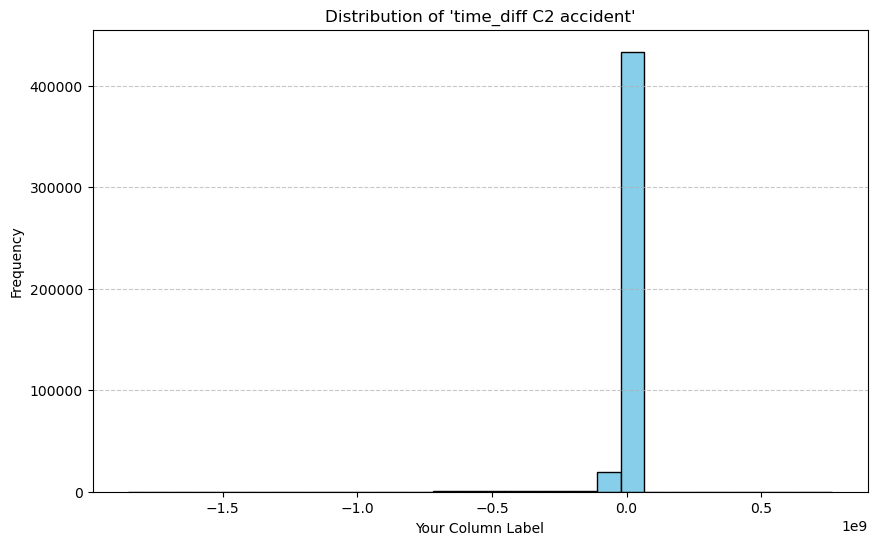

In [85]:
preProcess_categorical2_train['time_diff C2 accident'] = preProcess_categorical2_train['Accident Date']-preProcess_categorical2_train['C-2 Date']
plt.figure(figsize=(10, 6))
plt.hist(preProcess_categorical2_train['time_diff C2 accident'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of 'time_diff C2 accident'")
plt.xlabel("Your Column Label")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [86]:
# check for inconsistencies like add accident bebore being born
# check for bitrh year and c-date assembly date 
mean_difference_c2_accident = preProcess_categorical2_train['time_diff C2 accident'].mean()


# Fill NaN values in 'accident_date' with the calculated mean date for each set
preProcess_categorical2_train['Accident Date'].fillna(preProcess_categorical2_train['C-2 Date'] - mean_difference_c2_accident, inplace=True)
preProcess_categorical2_val['Accident Date'].fillna(preProcess_categorical2_val['C-2 Date'] - mean_difference_c2_accident, inplace=True)
preProcess_categorical2_test['Accident Date'].fillna(preProcess_categorical2_test['C-2 Date'] - mean_difference_c2_accident, inplace=True)

C:\Users\inesm\AppData\Local\Temp\ipykernel_7824\1155383969.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  preProcess_categorical2_train['Accident Date'].fillna(preProcess_categorical2_train['C-2 Date'] - mean_difference_c2_accident, inplace=True)
C:\Users\inesm\AppData\Local\Temp\ipykernel_7824\1155383969.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because

we fill the missing values in accident date with the mean of the train data for the same column

In [87]:
preProcess_categorical2_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459220 entries, 0 to 459219
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Claim Identifier                459220 non-null  int64  
 1   Carrier Type                    459220 non-null  object 
 2   Gender                          459220 non-null  object 
 3   COVID-19 Indicator              459220 non-null  object 
 4   C-3 Date                        149655 non-null  float64
 5   Alternative Dispute Resolution  459220 non-null  object 
 6   Zip Code                        459220 non-null  object 
 7   County of Injury                459220 non-null  object 
 8   Accident Date                   459220 non-null  float64
 9   District Name                   459220 non-null  object 
 10  Assembly Date                   459220 non-null  float64
 11  C-2 Date                        459220 non-null  float64
 12  time_diff C2 acc

### C-3 Date

In [88]:
preProcess_categorical2_train['Has C-3 Date'] = preProcess_categorical2_train['C-3 Date'].apply(lambda x: 0 if pd.isna(x) else 1)
preProcess_categorical2_val['Has C-3 Date'] = preProcess_categorical2_val['C-3 Date'].apply(lambda x: 0 if pd.isna(x)  else 1)
preProcess_categorical2_test['Has C-3 Date'] = preProcess_categorical2_test['C-3 Date'].apply(lambda x: 0 if pd.isna(x) else 1)

create a binary variable for C-3 Date

In [89]:
preProcess_categorical2_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Claim Identifier,459220.0,5.778956e+06,2.224024e+05,5.393066e+06,5.586662e+06,5.778242e+06,5.971532e+06,6.165685e+06
C-3 Date,149655.0,1.627336e+09,2.836561e+07,7.216128e+08,1.603757e+09,1.626826e+09,1.650413e+09,1.717114e+09
Accident Date,459220.0,1.619726e+09,5.892645e+07,-2.625696e+08,1.600128e+09,1.624925e+09,1.647821e+09,1.723934e+09
Assembly Date,459220.0,1.626720e+09,2.721536e+07,1.577837e+09,1.603757e+09,1.627603e+09,1.650413e+09,1.672445e+09
C-2 Date,459220.0,1.626459e+09,3.479012e+07,8.214048e+08,1.605226e+09,1.627258e+09,1.650413e+09,1.717200e+09
time_diff C2 accident,456264.0,-6.820794e+06,4.801212e+07,-1.852330e+09,-2.505600e+06,-8.640000e+05,-4.320000e+05,7.639488e+08
Has C-3 Date,459220.0,3.258896e-01,4.687068e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [90]:
preProcess_categorical2_train[['C-3 Date', 'Assembly Date', 'Accident Date','Has C-3 Date']].isna().sum()

C-3 Date         309565
Assembly Date         0
Accident Date         0
Has C-3 Date          0
dtype: int64

In [91]:
# add the index back to be able to commit the changes
preProcess_categorical2_train.set_index('Claim Identifier', inplace=True)
preProcess_categorical2_val.set_index('Claim Identifier', inplace=True)
preProcess_categorical2_test.set_index('Claim Identifier', inplace=True)
preProcess_categorical2_train.head()

,Carrier Type,Gender,COVID-19 Indicator,C-3 Date,Alternative Dispute Resolution,Zip Code,County of Injury,Accident Date,District Name,Assembly Date,C-2 Date,time_diff C2 accident,Has C-3 Date
Claim Identifier,,,,,,,,,,,,,
5785935,1A. PRIVATE,F,N,1.630282e+09,N,11432,QUEENS,1.628122e+09,NYC,1.628554e+09,1.628554e+09,-432000.0,1
6090033,1A. PRIVATE,M,N,1.664237e+09,N,11367,QUEENS,1.663114e+09,NYC,1.663718e+09,1.663718e+09,-604800.0,1
6136197,1A. PRIVATE,M,N,NaN,N,10956,ROCKLAND,1.667779e+09,NYC,1.668730e+09,1.668730e+09,-950400.0,0
6019545,1A. PRIVATE,M,N,1.647389e+09,N,08904,WESTCHESTER,1.599005e+09,NYC,1.655770e+09,1.655770e+09,-56764800.0,1
5792247,2A. SIF,F,N,1.638230e+09,N,12158,ALBANY,1.628813e+09,ALBANY,1.629245e+09,1.629245e+09,-432000.0,1


### Result:

In [92]:
features_imputed = X_train[list_column_analyze].isna().sum() - preProcess_categorical2_train[list_column_analyze].isna().sum()

print(X[list_column_analyze].isna().sum())
print(preProcess_categorical2_train[list_column_analyze].isna().sum())

print(f'Categorical features imputed: {features_imputed.sum()}')

Carrier Type                           0
Gender                                 0
COVID-19 Indicator                     0
C-3 Date                          386781
Alternative Dispute Resolution         0
Zip Code                           28637
County of Injury                       0
Accident Date                       3689
District Name                          0
Assembly Date                          0
C-2 Date                           14560
dtype: int64
Carrier Type                           0
Gender                                 0
COVID-19 Indicator                     0
C-3 Date                          309565
Alternative Dispute Resolution         0
Zip Code                               0
County of Injury                       0
Accident Date                          0
District Name                          0
Assembly Date                          0
C-2 Date                               0
dtype: int64
Categorical features imputed: 25784


In [93]:
# Commiting the changes to the original dataframes
X_train[list_column_analyze] = preProcess_categorical2_train[list_column_analyze]
X_val[list_column_analyze] = preProcess_categorical2_val[list_column_analyze]
X_test[list_column_analyze] = preProcess_categorical2_test[list_column_analyze]
X_train['Has C-3 Date'] = preProcess_categorical2_train['Has C-3 Date']
X_val['Has C-3 Date'] = preProcess_categorical2_val['Has C-3 Date']
X_test['Has C-3 Date'] = preProcess_categorical2_test['Has C-3 Date']
X_train.isna().sum()

Accident Date                             0
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                       0
Birth Year                            23242
C-2 Date                                  0
C-3 Date                             309565
Carrier Name                              0
Carrier Type                              0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   338679
Gender                                    0
IME-4 Count                               0
Industry Code                             0
Industry Code Description              7976
Medical Fee Region                        0
WCIO Cause of Injury Code                 0
WCIO Cause of Injury Description      12494
WCIO Nature of Injury Code      

In [94]:
X_val.isna().sum()

Accident Date                            0
Age at Injury                            0
Alternative Dispute Resolution           0
Assembly Date                            0
Attorney/Representative                  0
Average Weekly Wage                      0
Birth Year                            5836
C-2 Date                                 0
C-3 Date                             77216
Carrier Name                             0
Carrier Type                             0
County of Injury                         0
COVID-19 Indicator                       0
District Name                            0
First Hearing Date                   84549
Gender                                   0
IME-4 Count                              0
Industry Code                            0
Industry Code Description             1982
Medical Fee Region                       0
WCIO Cause of Injury Code                0
WCIO Cause of Injury Description      3146
WCIO Nature of Injury Code               0
WCIO Nature

In [95]:
X_train

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Has First Hearing Date,Has C-2 Date,Has C-3 Date
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5785935,1.628122e+09,49.0,N,1.628554e+09,Y,744.06,1971.0,1.628554e+09,1.630282e+09,PROPERTY AND CASUALTY,1A. PRIVATE,QUEENS,N,NYC,NaT,F,2.0,31.0,MANUFACTURING,IV,29.0,ON SAME LEVEL,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",42.0,LOWER BACK AREA,11432,6.0,1,1,1
6090033,1.663114e+09,56.0,N,1.663718e+09,Y,845.29,1966.0,1.663718e+09,1.664237e+09,EVEREST PREMIER INSURANCE,1A. PRIVATE,QUEENS,N,NYC,1970-01-01 00:00:01.684195200,M,7.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,52.0,STRAIN OR TEAR,25.0,SOFT TISSUE,11367,5.0,1,1,1
6136197,1.667779e+09,48.0,N,1.668730e+09,N,0.00,1974.0,1.668730e+09,NaN,CHARTER OAK FIRE INS CO,1A. PRIVATE,ROCKLAND,N,NYC,NaT,M,0.0,48.0,TRANSPORTATION AND WAREHOUSING,III,68.0,STATIONARY OBJECT,10.0,CONTUSION,12.0,BRAIN,10956,2.0,1,1,0
6019545,1.599005e+09,55.0,N,1.655770e+09,N,0.00,0.0,1.655770e+09,1.647389e+09,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,WESTCHESTER,N,NYC,NaT,M,0.0,23.0,CONSTRUCTION,UK,60.0,"STRAIN OR INJURY BY, NOC",78.0,CARPAL TUNNEL SYNDROME,34.0,WRIST,08904,2.0,1,1,1
5792247,1.628813e+09,53.0,N,1.629245e+09,Y,668.08,1968.0,1.629245e+09,1.638230e+09,STATE INSURANCE FUND,2A. SIF,ALBANY,N,ALBANY,1970-01-01 00:00:01.695600000,F,0.0,44.0,RETAIL TRADE,I,29.0,ON SAME LEVEL,10.0,CONTUSION,18.0,SOFT TISSUE,12158,6.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837651,1.634256e+09,26.0,N,1.634602e+09,Y,1244.56,1995.0,1.634602e+09,1.636502e+09,INDEMNITY INSURANCE CO OF,1A. PRIVATE,WESTCHESTER,N,NYC,1970-01-01 00:00:01.642982400,M,1.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,III,98.0,"CUMULATIVE, NOC",80.0,"ALL OTHER CUMULATIVE INJURY, NOC",41.0,UPPER BACK AREA,10805,6.0,1,1,1
5781926,1.627430e+09,55.0,N,1.628035e+09,Y,969.26,NaN,1.628035e+09,1.629331e+09,REDWOOD FIRE & CASUALTY,1A. PRIVATE,QUEENS,N,NYC,1970-01-01 00:00:01.646611200,M,7.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",10.0,CONTUSION,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,11429,1.0,1,1,1
5890060,1.636589e+09,57.0,N,1.641254e+09,N,794.09,1964.0,1.641254e+09,NaN,UTICA MUTUAL INS CO,1A. PRIVATE,ERIE,N,BUFFALO,NaT,F,0.0,81.0,OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION),I,53.0,TWISTING,52.0,STRAIN OR TEAR,53.0,KNEE,14127,5.0,1,1,0


In [96]:


def process_date_columns(df):

    accident_col = df['Accident Date'].copy()
    # Replace 0.0 values with NaN in 'Birth Year'
    df['Birth Year'] = df['Birth Year'].replace(0.0, np.nan)

    # Ensure 'Accident Date' is in datetime format
    accident_col = pd.to_datetime(accident_col, errors='coerce')

    # Fill NaN values with calculated birth years in seconds
    if df['Birth Year'].isna().any():
        # Calculate the birth year by subtracting 'Age at Injury' (converted to years * 365.25 days) from 'Accident Date'
        calculated_birth_years = accident_col - pd.to_timedelta(df['Age at Injury'] * 365.25, unit='D')

        # Extract the year from the resulting date
        df['Birth Year'].fillna(calculated_birth_years.dt.year, inplace=True)

    # Ensure 'Birth Year' is numeric (in case it was converted to datetime)
    df['Birth Year'] = pd.to_numeric(df['Birth Year'], errors='coerce')

    # Convert the 'Birth Year' to datetime using the first day of the year (01-01)
    df['Birth Year'] = pd.to_datetime(df['Birth Year'], format='%Y', errors='coerce')

    # Convert to Unix timestamp using timestamp() method
    df['Birth Year'] = df['Birth Year'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)

    return df

# Apply the function to each dataset
X_train = process_date_columns(X_train)
X_val = process_date_columns(X_val)
X_test = process_date_columns(X_test)

# Check the info of the processed data
X_train.isna().sum()

C:\Users\inesm\AppData\Local\Temp\ipykernel_7824\1518018051.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Birth Year'].fillna(calculated_birth_years.dt.year, inplace=True)
C:\Users\inesm\AppData\Local\Temp\ipykernel_7824\1518018051.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

Accident Date                             0
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                       0
Birth Year                                0
C-2 Date                                  0
C-3 Date                             309565
Carrier Name                              0
Carrier Type                              0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   338679
Gender                                    0
IME-4 Count                               0
Industry Code                             0
Industry Code Description              7976
Medical Fee Region                        0
WCIO Cause of Injury Code                 0
WCIO Cause of Injury Description      12494
WCIO Nature of Injury Code      

In [97]:
X_train

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Has First Hearing Date,Has C-2 Date,Has C-3 Date
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5785935,1.628122e+09,49.0,N,1.628554e+09,Y,744.06,3.153600e+07,1.628554e+09,1.630282e+09,PROPERTY AND CASUALTY,1A. PRIVATE,QUEENS,N,NYC,NaT,F,2.0,31.0,MANUFACTURING,IV,29.0,ON SAME LEVEL,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",42.0,LOWER BACK AREA,11432,6.0,1,1,1
6090033,1.663114e+09,56.0,N,1.663718e+09,Y,845.29,-1.262304e+08,1.663718e+09,1.664237e+09,EVEREST PREMIER INSURANCE,1A. PRIVATE,QUEENS,N,NYC,1970-01-01 00:00:01.684195200,M,7.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,52.0,STRAIN OR TEAR,25.0,SOFT TISSUE,11367,5.0,1,1,1
6136197,1.667779e+09,48.0,N,1.668730e+09,N,0.00,1.262304e+08,1.668730e+09,NaN,CHARTER OAK FIRE INS CO,1A. PRIVATE,ROCKLAND,N,NYC,NaT,M,0.0,48.0,TRANSPORTATION AND WAREHOUSING,III,68.0,STATIONARY OBJECT,10.0,CONTUSION,12.0,BRAIN,10956,2.0,1,1,0
6019545,1.599005e+09,55.0,N,1.655770e+09,N,0.00,-1.735690e+09,1.655770e+09,1.647389e+09,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,WESTCHESTER,N,NYC,NaT,M,0.0,23.0,CONSTRUCTION,UK,60.0,"STRAIN OR INJURY BY, NOC",78.0,CARPAL TUNNEL SYNDROME,34.0,WRIST,08904,2.0,1,1,1
5792247,1.628813e+09,53.0,N,1.629245e+09,Y,668.08,-6.315840e+07,1.629245e+09,1.638230e+09,STATE INSURANCE FUND,2A. SIF,ALBANY,N,ALBANY,1970-01-01 00:00:01.695600000,F,0.0,44.0,RETAIL TRADE,I,29.0,ON SAME LEVEL,10.0,CONTUSION,18.0,SOFT TISSUE,12158,6.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837651,1.634256e+09,26.0,N,1.634602e+09,Y,1244.56,7.889184e+08,1.634602e+09,1.636502e+09,INDEMNITY INSURANCE CO OF,1A. PRIVATE,WESTCHESTER,N,NYC,1970-01-01 00:00:01.642982400,M,1.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,III,98.0,"CUMULATIVE, NOC",80.0,"ALL OTHER CUMULATIVE INJURY, NOC",41.0,UPPER BACK AREA,10805,6.0,1,1,1
5781926,1.627430e+09,55.0,N,1.628035e+09,Y,969.26,-1.735690e+09,1.628035e+09,1.629331e+09,REDWOOD FIRE & CASUALTY,1A. PRIVATE,QUEENS,N,NYC,1970-01-01 00:00:01.646611200,M,7.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",10.0,CONTUSION,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,11429,1.0,1,1,1
5890060,1.636589e+09,57.0,N,1.641254e+09,N,794.09,-1.893888e+08,1.641254e+09,NaN,UTICA MUTUAL INS CO,1A. PRIVATE,ERIE,N,BUFFALO,NaT,F,0.0,81.0,OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION),I,53.0,TWISTING,52.0,STRAIN OR TEAR,53.0,KNEE,14127,5.0,1,1,0


In [98]:
X_val.isna().sum()

Accident Date                            0
Age at Injury                            0
Alternative Dispute Resolution           0
Assembly Date                            0
Attorney/Representative                  0
Average Weekly Wage                      0
Birth Year                               0
C-2 Date                                 0
C-3 Date                             77216
Carrier Name                             0
Carrier Type                             0
County of Injury                         0
COVID-19 Indicator                       0
District Name                            0
First Hearing Date                   84549
Gender                                   0
IME-4 Count                              0
Industry Code                            0
Industry Code Description             1982
Medical Fee Region                       0
WCIO Cause of Injury Code                0
WCIO Cause of Injury Description      3146
WCIO Nature of Injury Code               0
WCIO Nature

#### Checking outliers 

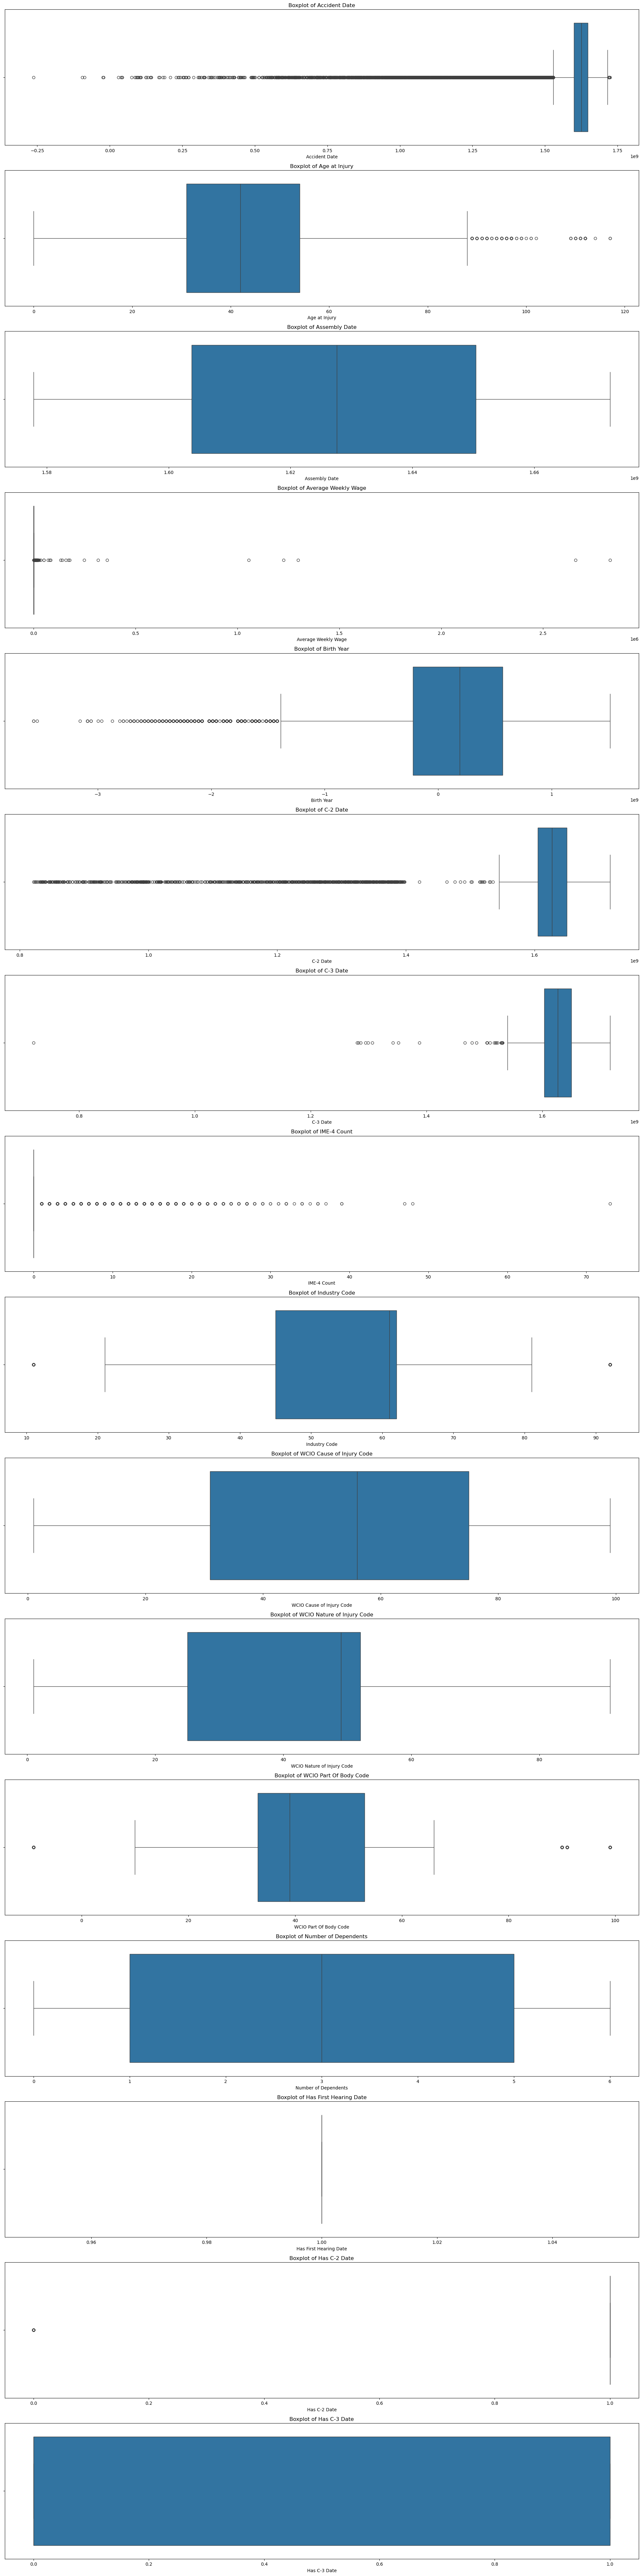

In [99]:

# Filtering out only numerical columns for boxplots
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# Creating boxplots for numerical features in the DataFrame
plt.figure(figsize=(20, len(numerical_columns) * 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(data=X_train, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

### Treating Outliers

In [100]:
outliers_train = X_train.copy()
outliers_val = X_val.copy()
outliers_test = X_test.copy()

### Treating Age Outliers

From domain knowledge implying a lower_bound for working at 14 and the upper_bound by the calculation of Q3 + 1.5 * IQR

In [101]:
# Calculate the IQR for 'Age at Injury'
Q1 = outliers_train['Age at Injury'].quantile(0.25)
Q3 = outliers_train['Age at Injury'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Count the number of values that would be capped in each dataset
train_lower_changes = (outliers_train['Age at Injury'] < 14).sum()
train_upper_changes = (outliers_train['Age at Injury'] > upper_bound).sum()

val_lower_changes = (outliers_val['Age at Injury'] < 14).sum()
val_upper_changes = (outliers_val['Age at Injury'] > upper_bound).sum()

test_lower_changes = (outliers_test['Age at Injury'] < 14).sum()
test_upper_changes = (outliers_test['Age at Injury'] > upper_bound).sum()

# Set lower limit to 14 and apply the calculated upper limit
outliers_train['Age at Injury'] = outliers_train['Age at Injury'].clip(lower=14, upper=upper_bound)
outliers_val['Age at Injury'] = outliers_val['Age at Injury'].clip(lower=14, upper=upper_bound)
outliers_test['Age at Injury'] = outliers_test['Age at Injury'].clip(lower=14, upper=upper_bound)

# Print the number of changes
print(f"Number of lower bound changes in train: {train_lower_changes}")
print(f"Number of upper bound changes in train: {train_upper_changes}")
print(f"Total changes in train: {train_lower_changes + train_upper_changes}")

print(f"Number of lower bound changes in val: {val_lower_changes}")
print(f"Number of upper bound changes in val: {val_upper_changes}")
print(f"Total changes in val: {val_lower_changes + val_upper_changes}")

print(f"Number of lower bound changes in test: {test_lower_changes}")
print(f"Number of upper bound changes in test: {test_upper_changes}")
print(f"Total changes in test: {test_lower_changes + test_upper_changes}")

Number of lower bound changes in train: 4400
Number of upper bound changes in train: 161
Total changes in train: 4561
Number of lower bound changes in val: 1111
Number of upper bound changes in val: 36
Total changes in val: 1147
Number of lower bound changes in test: 3283
Number of upper bound changes in test: 443
Total changes in test: 3726


### Treating Birth Year Outliers

In [102]:
# Calculate the IQR for 'Birth Year' in the training dataset
Q1 = outliers_train['Birth Year'].quantile(0.25)
Q3 = outliers_train['Birth Year'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = int(Q1 - 1.5 * IQR)
upper_bound = 2006  # Clipping upper bound to 2006

# Track changes for each dataset before clipping
train_birth_year_original = outliers_train['Birth Year'].copy()
val_birth_year_original = outliers_val['Birth Year'].copy()
test_birth_year_original = outliers_test['Birth Year'].copy()

# Apply clipping for 'Birth Year' based on the calculated bounds
outliers_train['Birth Year'] = outliers_train['Birth Year'].clip(lower=lower_bound, upper=upper_bound)
outliers_val['Birth Year'] = outliers_val['Birth Year'].clip(lower=lower_bound, upper=upper_bound)
outliers_test['Birth Year'] = outliers_test['Birth Year'].clip(lower=lower_bound, upper=upper_bound)

# Count the number of values that were clipped in each dataset
train_lower_changes = (train_birth_year_original < lower_bound).sum()
train_upper_changes = (train_birth_year_original > upper_bound).sum()
val_lower_changes = (val_birth_year_original < lower_bound).sum()
val_upper_changes = (val_birth_year_original > upper_bound).sum()
test_lower_changes = (test_birth_year_original < lower_bound).sum()
test_upper_changes = (test_birth_year_original > upper_bound).sum()

# Print the counts of changes
print(f"Number of lower bound changes in train: {train_lower_changes}")
print(f"Number of upper bound changes in train: {train_upper_changes}")
print(f"Total changes in train: {train_lower_changes + train_upper_changes}")

print(f"Number of lower bound changes in val: {val_lower_changes}")
print(f"Number of upper bound changes in val: {val_upper_changes}")
print(f"Total changes in val: {val_lower_changes + val_upper_changes}")

print(f"Number of lower bound changes in test: {test_lower_changes}")
print(f"Number of upper bound changes in test: {test_upper_changes}")
print(f"Total changes in test: {test_lower_changes + test_upper_changes}")

Number of lower bound changes in train: 19108
Number of upper bound changes in train: 272591
Total changes in train: 291699
Number of lower bound changes in val: 4732
Number of upper bound changes in val: 68247
Total changes in val: 72979
Number of lower bound changes in test: 16476
Number of upper bound changes in test: 252147
Total changes in test: 268623


In [103]:
outliers_train['Age at Injury'].max()
outliers_train['Birth Year'].min()

-1404302400.0

### Treating Wage Outliers

Log transformation on the wages as the distribution is heavily right skewed

In [104]:
# Apply log transformation for skewed wage values
outliers_train['Average Weekly Wage'] = outliers_train['Average Weekly Wage'].apply(lambda x: np.log1p(x) if x > 0 else 0)
outliers_val['Average Weekly Wage'] = outliers_val['Average Weekly Wage'].apply(lambda x: np.log1p(x) if x > 0 else 0)
outliers_test['Average Weekly Wage'] = outliers_test['Average Weekly Wage'].apply(lambda x: np.log1p(x) if x > 0 else 0)

# Count the number of values changed by log transformation
train_log_changes = (outliers_train['Average Weekly Wage'] != X_train['Average Weekly Wage']).sum()
val_log_changes = (outliers_val['Average Weekly Wage'] != X_val['Average Weekly Wage']).sum()
test_log_changes = (outliers_test['Average Weekly Wage'] != X_test['Average Weekly Wage']).sum()


print(f"Number of changes due to log transformation in train: {train_log_changes}")
print(f"Number of changes due to log transformation in val: {val_log_changes}")
print(f"Number of changes due to log transformation in test: {test_log_changes}")


Number of changes due to log transformation in train: 187611
Number of changes due to log transformation in val: 46568
Number of changes due to log transformation in test: 68796


## Dropping C-3 Date and First Hearing Date and Descriptions

In [105]:
#drpoing columns that are not needed
drop_cols = ['C-3 Date', 'First Hearing Date', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description','WCIO Part Of Body Description','Industry Code Description']

X_train = X_train.drop(drop_cols, axis=1)
X_test = X_test.drop(drop_cols, axis=1)
X_val = X_val.drop(drop_cols, axis=1)
X_train.isna().sum()

Accident Date                     0
Age at Injury                     0
Alternative Dispute Resolution    0
Assembly Date                     0
Attorney/Representative           0
Average Weekly Wage               0
Birth Year                        0
C-2 Date                          0
Carrier Name                      0
Carrier Type                      0
County of Injury                  0
COVID-19 Indicator                0
District Name                     0
Gender                            0
IME-4 Count                       0
Industry Code                     0
Medical Fee Region                0
WCIO Cause of Injury Code         0
WCIO Nature of Injury Code        0
WCIO Part Of Body Code            0
Zip Code                          0
Number of Dependents              0
Has First Hearing Date            0
Has C-2 Date                      0
Has C-3 Date                      0
dtype: int64

In [106]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459220 entries, 5785935 to 6027959
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Accident Date                   459220 non-null  float64
 1   Age at Injury                   459220 non-null  float64
 2   Alternative Dispute Resolution  459220 non-null  object 
 3   Assembly Date                   459220 non-null  float64
 4   Attorney/Representative         459220 non-null  object 
 5   Average Weekly Wage             459220 non-null  float64
 6   Birth Year                      459220 non-null  float64
 7   C-2 Date                        459220 non-null  float64
 8   Carrier Name                    459220 non-null  object 
 9   Carrier Type                    459220 non-null  object 
 10  County of Injury                459220 non-null  object 
 11  COVID-19 Indicator              459220 non-null  object 
 12  District Name 

- We decided to drop the columns mentioned above for this iteration, as they had too many missing values, and the binary variable created from them provided more usable information
- we also decided to drop the description columns keeping only the codes

# Results Pre-Processing:

In [107]:
print(f'Missing values after preprocessing in X_train: {X_train.isna().sum().sum()}')
print(f'Missing values after preproccessing in X_val: {X_val.isna().sum().sum()}')
print(f'Missing values after preprocessing in X_test: {X_test.isna().sum().sum()}')

Missing values after preprocessing in X_train: 0
Missing values after preproccessing in X_val: 0
Missing values after preprocessing in X_test: 0


# REMOVE THIS WHEN PRE PROCESSING IS CORRECT please :)

In [108]:

# X_train.fillna(0, inplace=True)
# X_val.fillna(0, inplace=True)
# X_test.fillna(0, inplace=True)

## Export clean data

In [109]:
# X_train.to_csv('X_train_cleaned.csv')
# X_val.to_csv('X_val_cleaned.csv')
# X_test.to_csv('X_test_cleaned.csv')

## 3.4 Data Scaling (Numerical)

In [110]:
numerical_scaling_train = X_train[['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']].copy()
numerical_scaling_val = X_val[['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']].copy()
numerical_scaling_test = X_test[['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']].copy()

In [111]:
#call function
scaler = MinMaxScaler()

#fit to training data
scaler.fit(numerical_scaling_train)

#transform the data
X_train_num_scaled = scaler.transform(numerical_scaling_train) # this will return an array
X_val_num_scaled = scaler.transform(numerical_scaling_val) # this will return an array
X_test_num_scaled = scaler.transform(numerical_scaling_test) # this will return an array


#show results
X_train_num_scaled

array([[0.41880342, 0.70806408, 0.02739726, 1.        ],
       [0.47863248, 0.67701177, 0.09589041, 0.83333333],
       [0.41025641, 0.72670227, 0.        , 0.33333333],
       ...,
       [0.48717949, 0.66458064, 0.        , 0.83333333],
       [0.        , 0.86334263, 0.        , 0.66666667],
       [0.22222222, 0.86334263, 0.        , 0.33333333]])

In [112]:
numerical_scaling_train = pd.DataFrame(X_train_num_scaled, columns = numerical_scaling_train.columns).set_index(X_train.index)
numerical_scaling_val = pd.DataFrame(X_val_num_scaled, columns = numerical_scaling_val.columns).set_index(X_val.index)
numerical_scaling_test = pd.DataFrame(X_test_num_scaled, columns = numerical_scaling_test.columns).set_index(X_test.index)

In [113]:
X_train[['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']] = numerical_scaling_train
X_val[['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']] = numerical_scaling_val
X_test[['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']] = numerical_scaling_test

In [114]:
X_train.head().T

Claim Identifier,5785935,6090033,6136197,6019545,5792247
Accident Date,1628121600.0,1663113600.0,1667779200.0,1599004800.0,1628812800.0
Age at Injury,0.418803,0.478632,0.410256,0.470085,0.452991
Alternative Dispute Resolution,N,N,N,N,N
Assembly Date,1628553600.0,1663718400.0,1668729600.0,1655769600.0,1629244800.0
Attorney/Representative,Y,Y,N,N,Y
Average Weekly Wage,744.06,845.29,0.0,0.0,668.08
Birth Year,0.708064,0.677012,0.726702,0.360231,0.689426
C-2 Date,1628553600.0,1663718400.0,1668729600.0,1655769600.0,1629244800.0
Carrier Name,PROPERTY AND CASUALTY,EVEREST PREMIER INSURANCE,CHARTER OAK FIRE INS CO,NEW HAMPSHIRE INSURANCE CO,STATE INSURANCE FUND
Carrier Type,1A. PRIVATE,1A. PRIVATE,1A. PRIVATE,1A. PRIVATE,2A. SIF


### Scaling Timestamps

In [115]:
date_cols = X_train.columns[X_train.columns.str.contains('Date')].drop(['Has First Hearing Date', 'Has C-2 Date', 'Has C-3 Date'])


In [116]:
X_train_time_scaling = X_train[date_cols].copy()
X_val_time_scaling = X_val[date_cols].copy()
X_test_time_scaling = X_test[date_cols].copy()

In [117]:
scaler = MinMaxScaler()
scaler.fit(X_train_time_scaling)

MinMaxScaler()

In [118]:
X_train_scaled = scaler.transform(X_train_time_scaling)
X_val_scaled = scaler.transform(X_val_time_scaling)
X_test_scaled = scaler.transform(X_test_time_scaling)

In [119]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_time_scaling.columns).set_index(X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val_time_scaling.columns).set_index(X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_time_scaling.columns).set_index(X_test.index)

In [120]:
X_train[X_train_time_scaling.columns] = X_train_scaled
X_val[X_val_time_scaling.columns] = X_val_scaled
X_test[X_test_time_scaling.columns] = X_test_scaled

In [121]:
X_train_scaled.head()

,Accident Date,Assembly Date,C-2 Date
Claim Identifier,,,
5785935,0.951768,0.536073,0.901042
6090033,0.969383,0.907763,0.940297
6136197,0.971732,0.960731,0.945891
6019545,0.937111,0.823744,0.931424
5792247,0.952116,0.543379,0.901813


## 3.5 Encoding

In [122]:
X_train_encoded = X_train.copy()
X_val_encoded = X_val.copy()
X_test_encoded = X_test.copy()

y_train_encoded = y_train.copy()
y_val_encoded = y_val.copy()

Change all Codes to Strings

In [123]:
# Print data types before the change
print("Data types before change:")
categorical = X_train_encoded.select_dtypes(include=['object']).columns.tolist()
print(categorical)

# Identify columns that end with "Code"
code_columns = [col for col in X_train_encoded.columns if col.endswith("Code")]

# Convert these columns to strings without altering values
X_train_encoded[code_columns] = X_train_encoded[code_columns].astype(str)
X_val_encoded[code_columns] = X_val_encoded[code_columns].astype(str)
X_test_encoded[code_columns] = X_test_encoded[code_columns].astype(str)

# Print data types after the change
print("\nData types after change:")
print(X_train_encoded.dtypes)

Data types before change:
['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Name', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender', 'Medical Fee Region', 'Zip Code']

Data types after change:
Accident Date                     float64
Age at Injury                     float64
Alternative Dispute Resolution     object
Assembly Date                     float64
Attorney/Representative            object
Average Weekly Wage               float64
Birth Year                        float64
C-2 Date                          float64
Carrier Name                       object
Carrier Type                       object
County of Injury                   object
COVID-19 Indicator                 object
District Name                      object
Gender                             object
IME-4 Count                       float64
Industry Code                      object
Medical Fee Region                 object
WCIO Cause of Injury Code          ob

In [124]:
categorical = X_train_encoded.select_dtypes(include=['object']).columns.tolist()
categorical

['Alternative Dispute Resolution',
 'Attorney/Representative',
 'Carrier Name',
 'Carrier Type',
 'County of Injury',
 'COVID-19 Indicator',
 'District Name',
 'Gender',
 'Industry Code',
 'Medical Fee Region',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code',
 'Zip Code']

In [125]:
categorical_features = [col for col in categorical 
    if 'Date' not in col and 'Year' not in col and 'Description' not in col
]
categorical_features = categorical_features

In [126]:
enc1 = OneHotEncoder(handle_unknown= 'ignore', sparse_output=False, drop='first')  # 'drop=first' to avoid multicollinearity
enc2 = LabelEncoder() #encoder for labels

Splitting into low and high-cardinlity because of memory errors using OneHotEncoding for high-cardinality features e.g Carrier Name, Zip code

In [127]:
print(X_val.columns)

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'IME-4 Count', 'Industry Code', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
       'WCIO Part Of Body Code', 'Zip Code', 'Number of Dependents',
       'Has First Hearing Date', 'Has C-2 Date', 'Has C-3 Date'],
      dtype='object')


In [128]:
# Select columns with low cardinality for one-hot encoding
low_cardinality_cols = [col for col in categorical_features if X_train_encoded[col].nunique() < 10]

print(low_cardinality_cols)
# Fit the encoder on X_train_encoded
enc1.fit(X_train_encoded[low_cardinality_cols])

# Transform X_train_encoded
encoded_low_cardinality_train = enc1.transform(X_train_encoded[low_cardinality_cols])

# Convert to DataFrame for X_train_encoded
encoded_df_train = pd.DataFrame(encoded_low_cardinality_train, 
                                columns=enc1.get_feature_names_out(low_cardinality_cols), 
                                index=X_train_encoded.index)

# Transform X_val and X_test using the already-fitted encoder
encoded_low_cardinality_val = enc1.transform(X_val[low_cardinality_cols])
encoded_df_val = pd.DataFrame(encoded_low_cardinality_val, 
                              columns=enc1.get_feature_names_out(low_cardinality_cols), 
                              index=X_val.index)

encoded_low_cardinality_test = enc1.transform(X_test[low_cardinality_cols])
encoded_df_test = pd.DataFrame(encoded_low_cardinality_test, 
                               columns=enc1.get_feature_names_out(low_cardinality_cols), 
                               index=X_test.index)

# Drop original low-cardinality columns and concatenate the one-hot encoded columns
X_train_encoded = X_train_encoded.drop(columns=low_cardinality_cols)
X_train_encoded = pd.concat([X_train_encoded, encoded_df_train], axis=1)

X_val_encoded = X_val.drop(columns=low_cardinality_cols)
X_val_encoded = pd.concat([X_val_encoded, encoded_df_val], axis=1)

X_test_encoded = X_test.drop(columns=low_cardinality_cols)
X_test_encoded = pd.concat([X_test_encoded, encoded_df_test], axis=1)


['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Type', 'COVID-19 Indicator', 'District Name', 'Gender', 'Medical Fee Region']


In [129]:
# Identify high-cardinality columns for frequency encoding that exist in X_train_encoded
high_cardinality_cols = [col for col in categorical_features if col in X_train_encoded.columns and X_train_encoded[col].nunique() >= 10]

# Apply frequency encoding to high-cardinality columns in X_train, X_val, and X_test
for col in high_cardinality_cols:
    # Calculate the frequency map from the training set
    frequency_map = X_train_encoded[col].value_counts(normalize=True)
    
    # Apply the frequency map to the training set
    X_train_encoded[col] = X_train_encoded[col].map(frequency_map)
    
    # Apply the frequency map to the validation set, filling unseen categories with 0 or a default value
    X_val_encoded[col] = X_val_encoded[col].map(frequency_map).fillna(0)
    
    # Apply the frequency map to the test set, filling unseen categories with 0 or a default value
    X_test_encoded[col] = X_test_encoded[col].map(frequency_map).fillna(0)


In [130]:
X_train_encoded.head().T

Claim Identifier,5785935,6090033,6136197,6019545,5792247
Accident Date,0.951768,0.969383,0.971732,0.937111,0.952116
Age at Injury,0.418803,0.478632,0.410256,0.470085,0.452991
Assembly Date,0.536073,0.907763,0.960731,0.823744,0.543379
Average Weekly Wage,744.060000,845.290000,0.000000,0.000000,668.080000
Birth Year,0.708064,0.677012,0.726702,0.360231,0.689426
C-2 Date,0.901042,0.940297,0.945891,0.931424,0.901813
Carrier Name,0.003846,0.000825,0.029792,0.022259,0.193350
County of Injury,0.101546,0.101546,0.015914,0.044920,0.023838
IME-4 Count,0.027397,0.095890,0.000000,0.000000,0.000000
Industry Code,0.017623,0.065049,0.065049,0.053748,0.075874


Encoding Target variable

In [131]:
enc2.fit(y_train_encoded)

y_train_encoded = enc2.transform(y_train_encoded)
y_val_encoded = enc2.transform(y_val_encoded)

Now we have encoded in a diferent df but i dont know how to encode them directly in the x_train without encoding things we dont want

In [132]:
X_train_encoded.head().T

Claim Identifier,5785935,6090033,6136197,6019545,5792247
Accident Date,0.951768,0.969383,0.971732,0.937111,0.952116
Age at Injury,0.418803,0.478632,0.410256,0.470085,0.452991
Assembly Date,0.536073,0.907763,0.960731,0.823744,0.543379
Average Weekly Wage,744.060000,845.290000,0.000000,0.000000,668.080000
Birth Year,0.708064,0.677012,0.726702,0.360231,0.689426
C-2 Date,0.901042,0.940297,0.945891,0.931424,0.901813
Carrier Name,0.003846,0.000825,0.029792,0.022259,0.193350
County of Injury,0.101546,0.101546,0.015914,0.044920,0.023838
IME-4 Count,0.027397,0.095890,0.000000,0.000000,0.000000
Industry Code,0.017623,0.065049,0.065049,0.053748,0.075874


## Export scaled and encoding data

In [133]:
# X_train_encoded.to_csv('X_train_encoded.csv')
# y_train_encoded.to_csv('X_test_encoded.csv')
#
# X_val_encoded.to_csv('X_val_encoded.csv')
# y_val_encoded.to_csv('y_val_encoded.csv')

## RFE with Random Forest

Random Sample from the data set

In [134]:
# Take a random sample of 5000 rows from X_train_encoded and y_train_encoded
X_train_sample = X_train_encoded.sample(n=5000, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

In [135]:
# Identify columns with 'Date' in their name
date_columns = [col for col in X_train_sample.columns if 'Date' in col]

# Check data types of each date column
for col in date_columns:
    print(f"Data type of '{col}' column:", X_train_sample[col].dtype)



Data type of 'Accident Date' column: float64
Data type of 'Assembly Date' column: float64
Data type of 'C-2 Date' column: float64
Data type of 'Has First Hearing Date' column: int64
Data type of 'Has C-2 Date' column: int64
Data type of 'Has C-3 Date' column: int64


['Accident Date', 'Age at Injury', 'Assembly Date', 'Average Weekly Wage', 'Birth Year', 'C-2 Date', 'Carrier Name', 'County of Injury', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code', 'Number of Dependents', 'Has C-2 Date', 'Alternative Dispute Resolution_Y', 'Attorney/Representative_Y', 'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE', 'Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS', 'Carrier Type_5D. SPECIAL FUND - UNKNOWN', 'Carrier Type_UNKNOWN', 'COVID-19 Indicator_Y', 'District Name_BINGHAMTON', 'District Name_BUFFALO', 'District Name_HAUPPAUGE', 'District Name_NYC', 'District Name_ROCHESTER', 'District Name_STATEWIDE', 'District Name_SYRACUSE', 'Gender_M', 'Gender_U', 'Gender_X', 'Medical Fee Region_II', 'Medical Fee Region_III', 'Medical Fee Region_IV', 'Medical Fee Region_UK']

### RFECV

commented out for runtime

In [136]:
#  # Initialize RandomForest model
# rf_model = RandomForestClassifier(random_state=42)

# # Set up cross-validation strategy
# cv_strategy = StratifiedKFold(n_splits=5)

# # Set up RFECV with RandomForest and cross-validation
# rfecv = RFECV(estimator=rf_model, step=1, cv=cv_strategy, scoring='accuracy')  # You can change scoring metric if needed

# # Fit RFECV
# rfecv.fit(X_train_sample, y_train_sample)

# #Get the selected features
# selected_features = X_train_sample.columns[rfecv.support_].tolist()
# optimal_num_features = rfecv.n_features_

# print("Optimal number of features:", optimal_num_features)
# print("Selected Features:", selected_features)

# # # Now 'selected_features' contains the list of features selected by RFECV

## 4. Models


### 4.1 Random Forest

In [137]:
# # 4. Build a simple model and assess the performance
# # Split data into training and validation sets



# # Train a Random Forest model

# model = RandomForestClassifier(random_state=42)
# model.fit(X_train_encoded, y_train_encoded)


# y_pred = model.predict(X_val_encoded)

# y_pred = enc2.inverse_transform(y_pred)

In [138]:
# # Caculate macro F1 score

# f1 = f1_score(y_val, y_pred, average='macro')
# print(f'Macro F1 score: {f1:.4f}')

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
selected_features = ['Accident Date', 'Age at Injury', 'Assembly Date', 'Average Weekly Wage', 'Birth Year', 'C-2 Date', 'Carrier Name', 'County of Injury', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code', 'Number of Dependents', 'Has C-2 Date', 'Alternative Dispute Resolution_Y', 'Attorney/Representative_Y', 'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE', 'Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS', 'Carrier Type_5D. SPECIAL FUND - UNKNOWN', 'Carrier Type_UNKNOWN', 'COVID-19 Indicator_Y', 'District Name_BINGHAMTON', 'District Name_BUFFALO', 'District Name_HAUPPAUGE', 'District Name_NYC', 'District Name_ROCHESTER', 'District Name_STATEWIDE', 'District Name_SYRACUSE', 'Gender_M', 'Gender_U', 'Gender_X', 'Medical Fee Region_II', 'Medical Fee Region_III', 'Medical Fee Region_IV', 'Medical Fee Region_UK']

In [149]:
from sklearn.metrics import accuracy_score, f1_score

X_train_selected = X_train_encoded[selected_features]
X_val_selected = X_val_encoded[selected_features]
X_test_selected = X_test_encoded[selected_features]

y_train_encoded
y_val_encoded

model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train_selected, y_train_encoded)

#predict val
y_pred_val = model.predict(X_val_selected)
#predict test
y_pred_test = model.predict(X_test_selected)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_val_encoded, y_pred_val)
f1 = f1_score(y_val_encoded, y_pred_val, average='weighted')  # For multiclass use 'weighted' or 'macro' for averaging

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.72
F1 Score: 0.62


c:\Users\inesm\anaconda3\envs\DM2425\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


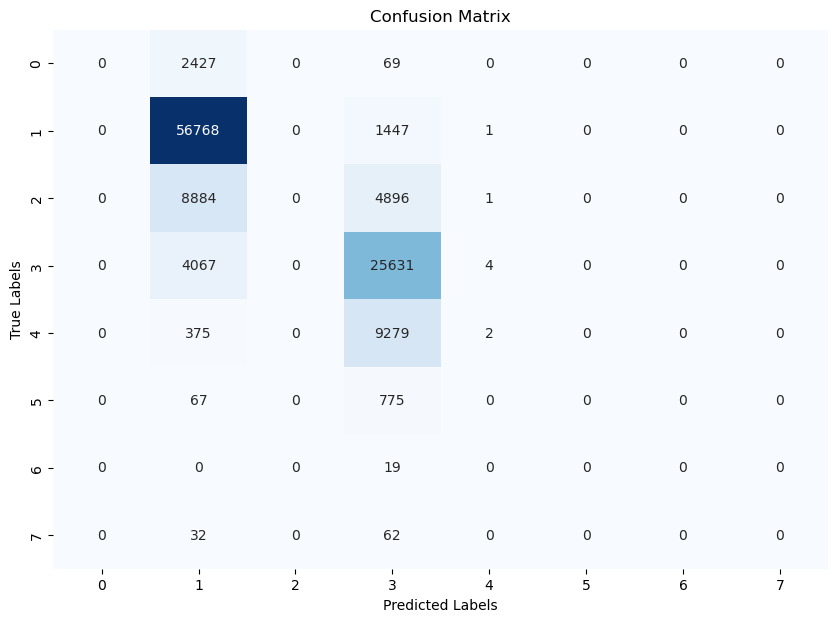

In [142]:
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val_encoded, y_pred_val)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()



In [150]:
test = enc2.inverse_transform(y_pred_test)
test
## formating the submission file
X_test['Claim Injury Type'] = test
sample_submission = X_test[['Claim Injury Type']]
sample_submission.to_csv('sample_submission_logistic.csv')

In [144]:
from sklearn.naive_bayes import CategoricalNB



In [147]:
X_train_selected = X_train_encoded[selected_features]
X_val_selected = X_val_encoded[selected_features]
X_test_selected = X_test_encoded[selected_features]

y_train_encoded
y_val_encoded

modelNB = CategoricalNB()

# Train the model
modelNB.fit(X_train_selected, y_train_encoded)

#predict val
y_pred_val = modelNB.predict(X_val_selected)
#predict test
y_pred_test = modelNB.predict(X_test_selected)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_val_encoded, y_pred_val)
f1 = f1_score(y_val_encoded, y_pred_val, average='weighted')  # For multiclass use 'weighted' or 'macro' for averaging

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.73
F1 Score: 0.65


In [148]:
test = enc2.inverse_transform(y_pred_test)
test
## formating the submission file
X_test['Claim Injury Type'] = test
sample_submission = X_test[['Claim Injury Type']]
sample_submission.to_csv('sample_submission_nb.csv')